In [ ]:
while(True):
    
    try:
        del range
    except:
        pass

    import requests
    from bs4 import BeautifulSoup
    from datetime import datetime,timedelta
    import pandas as pd
    import numpy as np
    saat=datetime.now().hour
    import cloudscraper
    from datetime import datetime
    from concurrent.futures import ThreadPoolExecutor,as_completed
    simdi = datetime.now()
    saat1 = simdi.hour
    dakika = simdi.minute


    saatimm=datetime.now().hour
   
    if saatimm<24:
        import time
        tarih=pd.read_csv("tarih.csv")
        tarih=pd.to_datetime(tarih.iloc[0,0])


        # D√∂ng√º √ßalƒ±≈üabilir durumda
        print("D√∂ng√º ba≈üladƒ±, saat:", simdi.strftime("%H:%M:%S"))

                    

        bug√ºn=datetime.now().strftime("%Y-%m-%d")



        d√ºn=(datetime.now()-timedelta(days=1)).strftime("%Y-%m-%d")


        data=pd.read_csv("sepet.csv",index_col=0)
        data=data.rename(columns={"√úr√ºn Adƒ±":"√úr√ºn"})

        data.index.name=""

        try:
            data=data.drop(f"{bug√ºn}",axis=1)
        except:
            pass





        def veriekle(√ºr√ºn, data, urunler_df):
            if urunler_df is None or urunler_df.empty:
                return data
            else:

                if isinstance(data.loc[√ºr√ºn], pd.Series):
                        urun_data=pd.DataFrame(data.loc[√ºr√ºn]).T
                        urun_data = pd.merge(
                            urun_data, 
                            urunler_df, 
                            on='√úr√ºn', 
                            how='outer'
                        )
                    
                    # √áakƒ±≈üan s√ºtunlarƒ± birle≈ütir
                        if f'{bug√ºn}_x' in urun_data.columns and f'{bug√ºn}_x' in urun_data.columns:
                            urun_data[f'{bug√ºn}'] = urun_data[f'{bug√ºn}_x'].combine_first(urun_data[f'{bug√ºn}_y'])
                            urun_data.drop([f'{bug√ºn}_x', f'{bug√ºn}_y'], axis=1, inplace=True)
                        
                        # ƒ∞ndeksi d√ºzenle
                            urun_data = urun_data.set_index([[√ºr√ºn] * len(urun_data)])
                            
                            # Mevcut √ºr√ºn√º veri setinden kaldƒ±r
                            data = data.drop(√ºr√ºn, axis=0)
                            
                            # Yeni veriyi ekle
                            data = pd.concat([data, urun_data], axis=0)
                    
                    
                else:
                    
                    urun_data = data.loc[√ºr√ºn]
                    
                    # Merge i≈ülemi sƒ±rasƒ±nda s√ºtun √ßakƒ±≈ümasƒ± ya≈üanƒ±rsa, √∂nekler olu≈üur
                    urun_data = pd.merge(
                        urun_data, 
                        urunler_df, 
                        on='√úr√ºn', 
                        how='outer'
                    )
                    
                    # √áakƒ±≈üan s√ºtunlarƒ± birle≈ütir
                    if f'{bug√ºn}_x' in urun_data.columns and f'{bug√ºn}_x' in urun_data.columns:
                        urun_data[f'{bug√ºn}'] = urun_data[f'{bug√ºn}_x'].combine_first(urun_data[f'{bug√ºn}_y'])
                        urun_data.drop([f'{bug√ºn}_x', f'{bug√ºn}_y'], axis=1, inplace=True)
                    
                    # ƒ∞ndeksi d√ºzenle
                    urun_data = urun_data.set_index([[√ºr√ºn] * len(urun_data)])
                    
                    # Mevcut √ºr√ºn√º veri setinden kaldƒ±r
                    data = data.drop(√ºr√ºn, axis=0)
                    
                    # Yeni veriyi ekle
                    data = pd.concat([data, urun_data], axis=0)

                return data
                    
                    







        import re
        import requests
        from bs4 import BeautifulSoup
        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC
        from time import sleep
        import pandas as pd
        from webdriver_manager.chrome import ChromeDriverManager






        import re
        import requests
        from bs4 import BeautifulSoup
        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC
        from time import sleep
        import pandas as pd
        from webdriver_manager.chrome import ChromeDriverManager

        def scrape_sok(urls):
            df=[]
            for url in urls:

                response = requests.get(url)

                # Sayfa ba≈üarƒ±lƒ± ≈üekilde alƒ±ndƒ±ysa
                if response.status_code == 200:
                    # Sayfanƒ±n HTML i√ßeriƒüini parse ediyoruz
                    soup = BeautifulSoup(response.text, 'html.parser')

                    # √úr√ºnleri se√ßiyoruz, her bir √ºr√ºn div'ini tanƒ±mlƒ±yoruz
                    products = soup.find_all('div', class_='CProductCard-module_productCardWrapper__okAmT')

                    # √úr√ºnleri listeleyelim
                    for product in products:
                        # √úr√ºn adƒ±
                        name = product.find('h2', class_='CProductCard-module_title__u8bMW').text.strip()
                        
                        # √úr√ºn fiyatƒ±
                        price = product.find('span', class_='CPriceBox-module_price__bYk-c')
                        discounted_price = product.find('span', class_='CPriceBox-module_discountedPrice__15Ffw')
                        if not price:
                            price = discounted_price
                        if price and discounted_price:
                            price=discounted_price
                        price=price.text.strip()
                        price=price.replace("‚Ç∫","").replace(".","").replace(",",".")
                        price=float(price)
                        
                    
                        print(f"√úr√ºn Adƒ±: {name}")
                        print(f"Fiyat: {price}")
                        print("-" * 40)
                        df.append({"Product Name":name,"Price (TRY)":price})
                        

                else:
                    print("Sayfa alƒ±namadƒ±, hata kodu:", response.status_code)
                df=pd.DataFrame(df)
                return df






        def clean_price(price_text):
            price_text = price_text.replace("TL", "").strip()  # "TL" ibaresini kaldƒ±r
            price_text = price_text.replace(",", ".")  # T√ºrk√ße ondalƒ±k formatƒ± d√ºzelt
            try:
                return float(price_text)
            except ValueError:
                return None
        def scrape_migros_products(pages):
            urunad = []
            urunfiyat = []

            headers = {
                "User-Agent": "Mozilla/5.0",
                "Accept": "application/json, text/plain, */*"
            }

            scraper = cloudscraper.CloudScraper()

            def sayfa_sayisi(url):
                return scraper.get(url, headers=headers).json()["data"]["searchInfo"]["pageCount"]

            def sayfa_verisini_cek(url, sayfa):
                response = scraper.get(f"{url}?page={sayfa}", headers=headers).json()
                return response["data"]["searchInfo"]["storeProductInfos"]

            with ThreadPoolExecutor(max_workers=5) as executor:
                futures = []
                for i in pages:
                    try:
                        sayfa_sayisi_val = sayfa_sayisi(i)
                        for j in range(1, sayfa_sayisi_val + 1):
                            futures.append(executor.submit(sayfa_verisini_cek, i, j))
                    except Exception as e:
                        print(f"‚ö†Ô∏è Sayfa sayƒ±sƒ± belirlenirken hata olu≈ütu: {e}")

                for future in as_completed(futures):
                    try:
                        info = future.result()
                        for urun in info:
                            urunad.append(urun.get("name"))
                            urunfiyat.append(int(urun.get("salePrice")) / 100)
                    except Exception as e:
                        print(f"‚ö†Ô∏è Sayfa verisi √ßekerken hata olu≈ütu: {e}")

            veri = pd.DataFrame({"Product Name": urunad, "Price (TRY)": urunfiyat})
            print("‚úÖ Migros verisi √ßekildi!")
            return veri

        def scrape_carrefour_products(pages):
            print("üîç Carrefour verisi √ßekiliyor...")

            options = Options()
            options.add_argument("--headless")  # Ba≈üsƒ±z mod
            options.add_argument("--no-sandbox")
            options.add_argument("--disable-dev-shm-usage")
            options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")  # User-Agent
            service = Service(ChromeDriverManager().install())
            driver = webdriver.Chrome(service=service, options=options)

            carrefour_data = []

            for url in pages:
                print(f"üìå Scraping URL: {url}")
                driver.get(url)

                try:
                    # **Sayfanƒ±n tamamen y√ºklenmesini bekle**
                    WebDriverWait(driver, 5).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "li.product-listing-item"))
                    )

                    # **üìå Sayfanƒ±n sonuna kadar kaydƒ±rarak t√ºm √ºr√ºnleri y√ºkle**
                    last_height = driver.execute_script("return document.body.scrollHeight")
                    while True:
                        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                        time.sleep(3)  # Sayfanƒ±n y√ºklenmesini bekle
                        new_height = driver.execute_script("return document.body.scrollHeight")
                        if new_height == last_height:  # Daha fazla √ºr√ºn y√ºklenmiyorsa √ßƒ±k
                            break
                        last_height = new_height

                    # **üìå √úr√ºnleri bul**
                    products = driver.find_elements(By.CSS_SELECTOR, "li.product-listing-item")
                    print(f"‚úÖ Toplam √úr√ºn Sayƒ±sƒ±: {len(products)}")

                    for product in products:
                        try:
                            # **√úr√ºn adƒ±**
                            try:
                                name_element = product.find_element(By.CSS_SELECTOR, "h3.item-name")
                                product_name = name_element.text.strip()
                            except:
                                pass
                            # **Fiyatƒ± al**
                            try:
                                price_element = product.find_element(By.CSS_SELECTOR, "span.priceLineThrough.js-variant-price")
                                product_price_text = price_element.text.strip()
                            except:
                                try:
                                    price_element = product.find_element(By.CSS_SELECTOR, "span.item-price.js-variant-discounted-price")
                                    product_price_text = price_element.text.strip()
                                except:
                                    pass

                            product_price = clean_price(product_price_text)

                            if product_name and product_price is not None:
                                carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                                print(f"‚úÖ Collected - Product: {product_name}, Price: {product_price} TRY")

                        except Exception as e:
                            print(f"‚ö†Ô∏è Hata olu≈ütu: {e}")

                except Exception as e:
                    print(f"‚ùå Timeout veya ba≈üka hata olu≈ütu: {e}")

                

            driver.quit()
            return carrefour_data

        # üìå Ana Fonksiyon
        def vericek(carrefour, migros,sok, name):
            
            print(f"{name} verisi √ßekiliyor...")
            bug√ºn = time.strftime("%Y-%m-%d")  # Bug√ºn√ºn tarihini al

            migros_data = scrape_migros_products(migros)
            sok_data=scrape_sok(sok)
            

            try:
                if carrefour:
                    
                    carrefour_data = scrape_carrefour_products(carrefour)
                    
                carrefour_data = pd.DataFrame(carrefour_data)
                

                all_data = pd.concat([migros_data, carrefour_data,sok_data], axis=0)
            except Exception as e:
                print(f"‚ö†Ô∏è Carrefour verisi √ßekilirken hata olu≈ütu: {e}")
                all_data = all_data = pd.concat([migros_data,sok_data], axis=0)

            if all_data.empty:
                return pd.DataFrame()

            product_df = all_data.copy()
            product_df['Product Group'] = product_df['Product Name'].str.lower()

            # Geometrik ortalama hesaplama fonksiyonu
            def geometric_mean(prices):
                return np.exp(np.mean(np.log(prices)))

            geo_mean_df = (
                product_df.groupby(['Product Group'])
                .agg(
                    Geometric_Mean=('Price (TRY)', geometric_mean),
                    Product_Names=('Product Name', lambda x: ', '.join(x))                )
                .reset_index()
            )

            geo_mean_df = geo_mean_df.drop("Product Group", axis=1)
            geo_mean_df.columns = ["Price (TRY)", "Product Name"]

            urunler_df = geo_mean_df.copy()
            if not urunler_df.empty:
                urunler_df.columns = [str(bug√ºn), "√úr√ºn"]
                urunler_df.index = len(urunler_df) * [name]
                urunler_df = urunler_df.drop_duplicates().dropna()
                return urunler_df

            try:
                all_data.columns = ["√úr√ºn", str(bug√ºn)]
                return all_data
            except:
                return pd.DataFrame()

        carrefour = ["https://www.carrefoursa.com/pirinc/c/1134?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pirinc-c-427"
        ]
        sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]



        urunler_df=vericek(carrefour,migros_pages,sok,"Pirin√ß")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Pirin√ß",case=False)]

        data=veriekle("Pirin√ß",data,urunler_df)
            






        pages1 = ["https://www.carrefoursa.com/bugday-unu/c/1277?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]

            



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sade-un-c-289b"]

        sok=["https://www.sokmarket.com.tr/un-c-1782"]
        urunler_df=vericek(pages1,migros_pages,sok,"Buƒüday Unu")






        data=veriekle("Buƒüday Unu",data,urunler_df)









        pages1=["https://www.carrefoursa.com/bebek-mamasi/c/1848?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
            




        migros_pages =["https://www.migros.com.tr/rest/search/screens/devam-sutu-c-1136b"]
        sok=["https://www.sokmarket.com.tr/bebek-mama-c-20638"]

        urunler_df=vericek(pages1,migros_pages,sok,"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)")



        data=veriekle("Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",data,urunler_df)








        pages1 = ["https://www.carrefoursa.com/bulgur/c/1142?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
            




        # Define base URL and total pages to scrape for Migros
        migros_pages1= ["https://www.migros.com.tr/rest/search/screens/pilavlik-bulgur-c-2785"]
        sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]


        urunler_df=vericek(pages1,migros_pages1,sok,"Bulgur")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Bulgur",case=False)]

        data=veriekle("Bulgur",data,urunler_df)





        pages1 = ["https://www.migros.com.tr/rest/search/screens/ekmek-c-455"]
        carrefour=["https://www.carrefoursa.com/ekmek/c/2378?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        sok=["https://www.sokmarket.com.tr/ekmek-c-1240"]    




        urunler_df=vericek(carrefour,pages1,sok,"Ekmek")

        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ekmek",case=False)]

        data=veriekle("Ekmek",data,urunler_df)






        pages1 = ["https://www.carrefoursa.com/biskuvi/c/1529?q=%3AbestSeller%3Acategory%3A1534%3Acategory%3A1533%3Acategory%3A1537%3Acategory%3A1530%3Acategory%3A1531%3Acategory%3A1536%3AinStockFlag%3Atrue&show=All"]

            
        migros=["https://www.migros.com.tr/rest/search/screens/biskuvi-c-43c"]
        sok=["https://www.sokmarket.com.tr/biskuvi-c-20378?page=1","https://www.sokmarket.com.tr/biskuvi-c-20378?page=2","https://www.sokmarket.com.tr/biskuvi-c-20378?page=3",
                "https://www.sokmarket.com.tr/biskuvi-c-20378?page=4","https://www.sokmarket.com.tr/biskuvi-c-20378?page=5"]
        urunler_df=vericek(pages1,migros,sok,"Bisk√ºvi")




        data=veriekle("Bisk√ºvi",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/kraker/c/1538?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]









        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kraker-c-27ea"]

        sok=["https://www.sokmarket.com.tr/kraker-ve-tuzlu-biskuvi-c-20380"]

        urunler_df=vericek(pages1,migros_pages,sok,"Kraker")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kraker", case=False)]






        data=veriekle("Kraker",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/bar-ve-gofret/c/1505?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]

        migros=["https://www.migros.com.tr/rest/search/screens/gofret-c-43a"]
        sok=["https://www.sokmarket.com.tr/gofret-c-20379?page=3","https://www.sokmarket.com.tr/gofret-c-20379?page=2","https://www.sokmarket.com.tr/gofret-c-20379?page=1"]
        urunler_df=vericek(pages1,migros,sok,"Gofret")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Gofret|gofret", regex=True)]


        data=veriekle("Gofret",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/pastalar/c/1289?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pasta-c-459"]
        sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-54427"]
        urunler_df=vericek(pages1,migros_pages,sok,"Pasta")
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("pasta", case=False)]

        data=veriekle("Pasta",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/mini-kek/c/1547?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kek-c-43d"]
        sok=["https://www.sokmarket.com.tr/kek-c-20381?page=3","https://www.sokmarket.com.tr/kek-c-20381?page=2","https://www.sokmarket.com.tr/kek-c-20381?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Kek")


        data=veriekle("Kek",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/serbetli-tatli/c/1294?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pastane-tatlilar-c-287b"
        ]
        sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=2","https://www.sokmarket.com.tr/sekerleme-c-20388?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Baklava")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Baklava|baklava|Baklavasƒ±|baklavasƒ±", regex=True)]

            data=veriekle("Baklava",data,urunler_df)




        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yufka-c-2872"]
        sok=["https://www.sokmarket.com.tr/unlu-mamuller-c-29110"]
        urunler_df=vericek("",migros_pages,sok,"Ekmek Hamuru (Yufka)")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Yufka", case=False)]


        data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/makarna/c/1122?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
        sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Makarna")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Makarna", case=False)]

        data=veriekle("Makarna",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/makarna/c/1123?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
        sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"≈ûehriye")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("≈ûehriye|≈üehriye")]

                data=veriekle("≈ûehriye",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/kahvaltilik-gevrek/c/1378?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



            
            


        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/misir-gevregi-c-2773"]
        sok=["https://www.sokmarket.com.tr/kahvaltilik-gevrek-c-950"]
        urunler_df=vericek(pages1,migros_pages,sok,"M√ºsli ve Hububat √úr√ºnleri")


        data=veriekle("Tahƒ±l Gevreƒüi",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/dana/c/1046?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/dana-eti-c-3fa"

        ]
        sok=["https://www.sokmarket.com.tr/kirmizi-et-c-170"]
        urunler_df=vericek(pages1,migros_pages,sok,"Dana Eti")

        data=veriekle("Dana Eti",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/kuzu/c/1054?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kuzu-eti-c-3fb"]


        urunler_df=vericek(pages1,migros_pages,"","Kuzu Eti")

        data=veriekle("Kuzu Eti",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/pilic/c/1061?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/pilic-c-3fe"]
        sok=["https://www.sokmarket.com.tr/beyaz-et-c-180"]
        urunler_df=vericek(pages1,migros_pages,sok,"Tavuk Eti")




        data=veriekle("Tavuk Eti",data,urunler_df)


        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sakatat-c-3fd"]
        sok=["https://www.sokmarket.com.tr/arama?q=kokore%C3%A7"]
        urunler_df=vericek("",migros_pages,sok,"Sakatat")


        data=veriekle("Sakatat",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/sucuk/c/1077?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sucuk-c-404"]

        sok=["https://www.sokmarket.com.tr/sucuk-c-200"]

        urunler_df=vericek(pages1,migros_pages,sok,"Sucuk")

        data=veriekle("Sucuk",data,urunler_df)





            
        pages1= ["https://www.carrefoursa.com/sosis/c/1084?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]


        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sosis-c-405"]


        sok=["https://www.sokmarket.com.tr/sosis-c-31228"]
        urunler_df=vericek(pages1,migros_pages,sok,"Sosis")




        data=veriekle("Sosis",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/salam-jambon-ve-fume/c/1092?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/salam-c-112d6"]
        sok=["https://www.sokmarket.com.tr/salam-c-31229"]
        urunler_df=vericek(pages1,migros_pages,sok,"Salam")



        data=veriekle("Salam",data,urunler_df)



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&90=503"]



        urunler_df=vericek("",migros_pages,"","Hazƒ±r Et Yemekleri")


        data=veriekle("Hazƒ±r Et Yemekleri",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/baliklar/c/1099?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/mevsim-baliklari-c-402"]

        urunler_df=vericek(pages1,migros_pages,"","Balƒ±k")

        data=veriekle("Balƒ±k",data,urunler_df)


            
        pages1= ["https://www.carrefoursa.com/paketli-urunler/c/1068?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/konserve-deniz-urunleri-c-285a"]

        sok=["https://www.sokmarket.com.tr/balik-konservesi-c-22773"]


        urunler_df=vericek(pages1,migros_pages,sok,"Deniz √úr√ºnleri")


        data=veriekle("Konserve Balƒ±k",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/sut/c/1311?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sut-c-6c"]
        sok=["https://www.sokmarket.com.tr/sut-c-470?page=2","https://www.sokmarket.com.tr/sut-c-470?page=1"]


        urunler_df=vericek(pages1,migros_pages,sok,"S√ºt")


        data=veriekle("S√ºt",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/yogurt/c/1389?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yogurt-c-6e"]

        sok=["https://www.sokmarket.com.tr/yogurt-c-480?page=2","https://www.sokmarket.com.tr/yogurt-c-480?page=1"]

        urunler_df=vericek(pages1,migros_pages,sok,"Yoƒüurt")



        data=veriekle("Yoƒüurt",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/sutlu-tatli-puding/c/1962?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sutlu-tatlilar-c-41c"]
        sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

        urunler_df=vericek(pages1,migros_pages,sok,"Hazƒ±r S√ºtl√º Tatlƒ±lar")





        data=veriekle("Hazƒ±r S√ºtl√º Tatlƒ±lar",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/beyaz-peynir/c/1319?q=%3AbestSeller&show=All"]



            

        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/beyaz-peynir-c-40b"]


        sok=["https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=2","https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Beyaz Peynir")





        data=veriekle("Beyaz Peynir",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/kasar-/c/1324?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        # Define the list of pages to scrape from Migros
        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kasar-peyniri-c-40d"]
        sok=["https://www.sokmarket.com.tr/kasar-peynir-c-520"]
        urunler_df=vericek(pages1,migros_pages,sok,"Ka≈üar Peyniri")



        data=veriekle("Ka≈üar Peyniri",data,urunler_df)



        pages1= ["https://www.carrefoursa.com/krem-peynir/c/1336?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/krem-peynir-c-2737"]


        sok=["https://www.sokmarket.com.tr/krem-peynir-c-510"]

        urunler_df=vericek(pages1,migros_pages,sok,"Krem Peynir")



        data=veriekle("Krem Peynir",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/yumurta/c/1349?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =   ["https://www.migros.com.tr/rest/search/screens/yumurta-c-70"]

        sok=["https://www.sokmarket.com.tr/yumurta-c-190"]

        urunler_df=vericek(pages1,migros_pages,sok,"Yumurta")




        data=veriekle("Yumurta",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/tereyag/c/1350?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/tereyagi-c-413"]

        sok=["https://www.sokmarket.com.tr/tereyag-c-31602"]

        urunler_df=vericek(pages1,migros_pages,sok,"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)")


        data=veriekle("Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",data,urunler_df)






            
        pages1= ["https://www.carrefoursa.com/margarin/c/1351?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/paket-margarin-c-274e"]

        sok=["https://www.sokmarket.com.tr/margarin-c-31727"]


        urunler_df=vericek(pages1,migros_pages,sok,"Margarin")


        data=veriekle("Margarin",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/zeytinyagi/c/1114?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/zeytinyagi-c-433"]
        sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]
        urunler_df=vericek(pages1,migros_pages,sok,"Zeytinyaƒüƒ±")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Zeytinyaƒüƒ±",case=False)]

        data=veriekle("Zeytinyaƒüƒ±",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/aycicek/c/1112?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/aycicek-yagi-c-42d"]

        sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]


        urunler_df=vericek(pages1,migros_pages,sok,"Ay√ßi√ßek Yaƒüƒ±")
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Zeytinyaƒüƒ±",case=False)]


        data=veriekle("Ay√ßi√ßek Yaƒüƒ±",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=652"]

        sok=["https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=2","https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=1"]


        urunler_df=vericek(pages1,migros_pages,sok,"Portakal")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Portakal|portakal")]



        data=veriekle("Portakal",data,urunler_df)




        def vericek1(carrefour="",migros="",name=""):
            
            try:

        # Function to clean and convert price text to float
                def clean_price(price_text):
                    # Remove any non-numeric characters except for commas and dots
                    price_text = re.sub(r'[^\d,.]', '', price_text)
                    # Replace commas with dots if needed (ensure it works with Turkish formatted numbers)
                    price_text = price_text.replace(',', '.')
                    try:
                        return float(price_text)
                    except ValueError:
                        return None



                # Function to scrape product names and prices from Carrefour for multiple URLs
                def scrape_carrefour_products(pages):
                    carrefour_data = []
                    
                    for url in pages:
                        print(f"Scraping URL: {url}")
                        driver.get(url)

                        try:
                            # Find all product links
                            product_elements = driver.find_elements(By.CSS_SELECTOR, 'a.product-return')

                            for index, product_element in enumerate(product_elements):
                                try:
                                    # Extract product name
                                    product_name_element = product_element.find_element(By.CSS_SELECTOR, 'h3.item-name')
                                    product_name = product_name_element.text.strip()

                                    # Extract product price
                                    # First, try to find the "priceLineThrough" element for non-discounted price
                                    try:
                                        price_line_through_element = product_element.find_element(By.CSS_SELECTOR, 'span.priceLineThrough.js-variant-price')
                                        price_line_through_text = price_line_through_element.text.strip()
                                        product_price = clean_price(price_line_through_text)
                                    except:
                                        # If no "priceLineThrough", fall back to the current price
                                        price_element = product_element.find_element(By.CSS_SELECTOR, 'span.item-price.js-variant-discounted-price')
                                        product_price_text = price_element.text.strip()
                                        product_price = clean_price(product_price_text)

                                    if product_name and product_price is not None:
                                        carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                                        print(f"Collected - Product: {product_name}, Price: {product_price} TRY")
                                    else:
                                        print(f"Skipping product with incomplete data on {url}")

                                except Exception as e:
                                    print(f"Error extracting data from product {index + 1} on {url}: {e}")
                            
                            sleep(2)  # Sleep to mimic human interaction and avoid detection
                        
                        except Exception as e:
                            print(f"Error while scraping {url}: {e}")

                    return carrefour_data


                # Define the list of pages to scrape from Migros
                migros_pages  = migros







                if migros:
                    
                    
                    migros_data = scrape_migros_products(migros)

                    
                if carrefour:
                    carrefour_data = scrape_carrefour_products(carrefour)

                if migros_data and carrefour:

                    all_data = migros_data + carrefour_data
                elif migros_data and not carrefour:
                    all_data=migros_data
                else:
                    all_data=carrefour_data
                product_df = pd.DataFrame(all_data)

                





                urunler_df = product_df.copy()
                if urunler_df is not None and not urunler_df.empty:
                    urunler_df.columns=["√úr√ºn",str(bug√ºn)]
                    urunler_df=urunler_df.groupby("√úr√ºn", as_index=False).agg({str(bug√ºn): 'mean'})

                    urunler_df.index=len(urunler_df)*[name]
                    urunler_df=urunler_df.drop_duplicates()
                    urunler_df=urunler_df.dropna()

                    return urunler_df
            except:
                    pass





                

            





        carrefour=["https://www.carrefoursa.com/yumusak-meyveler/c/1017?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"√úz√ºm")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√úz√ºm|√ºz√ºm", regex=True)]
                data=veriekle("√úz√ºm",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=604"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Armut")
        if urunler_df is not None : 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Armut|armut")]
                data=veriekle("Armut",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=606"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Ayva")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ayva|ayva")]

                data=veriekle("Ayva",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee?sayfa=1&93=614"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]
        urunler_df=vericek(carrefour,migros,sok,name="√áilek")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áilek|√ßilek")]


        data=veriekle("√áilek",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=618"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Elma")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Elma|elma")]


                data=veriekle("Elma",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]

        urunler_df=vericek(carrefour,migros,"",name="Karpuz")

        if urunler_df is not None: 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Karpuz|karpuz")]


                data=veriekle("Karpuz",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Kavun")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kavun|kavun", regex=True)]


                data=veriekle("Kavun",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Kivi")
        if urunler_df is not None :
            if not urunler_df.empty:
                    try:
                        urunler_df1=urunler_df[urunler_df["√úr√ºn"].str.contains("Kivisi Kg|Kivisi kg|Kivi Kg|Kivi kg|ƒ∞BB Hal Kivi|Gold")]

                        if urunler_df1 is not None :
                            if not urunler_df1.empty:
                                data=veriekle("Kivi",data,urunler_df1)
                    except:
                        urunler_df=pd.DataFrame(urunler_df).T
                        if urunler_df is not None :
                            if not urunler_df.empty:
                                data=veriekle("Kivi",data,urunler_df)
                        


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=639"]
        sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


        urunler_df=vericek(carrefour,migros,sok,"Limon")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Limon|limon", regex=True)]

                data=veriekle("Limon",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=640"]
        sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


        urunler_df=vericek(carrefour,migros,sok,"Mandalina")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mandalina Kg|Mandalina KG|Mandalina kg|mandalina kg|mandalina Kg|mandalina KG")]



                data=veriekle("Mandalina",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea?sayfa=1&93=645"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Muz")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Muz|muz", regex=True)]
                data=veriekle("Muz",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]
        urunler_df=vericek(carrefour,migros,sok,"≈ûeftali")



        data=veriekle("≈ûeftali",data,urunler_df)
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("≈ûeftali|≈üeftali")]


                data=veriekle("≈ûeftali",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=646"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]


        urunler_df=vericek(carrefour,migros,sok,"Nar")
        if urunler_df is not None:
            if not urunler_df.empty:

                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nar Kg|Nar kg|nar kg|nar Kg|Nar|nar", regex=True)]


                data=veriekle("Nar",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/badem/c/1523?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/badem-c-280f?sayfa=1&markalar=6570,425,4373,7923,652"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Badem ƒ∞√ßi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Badem", case=False)]
                
                data=veriekle("Badem ƒ∞√ßi",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/ceviz/c/1524?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ceviz-ici-c-2805"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Ceviz ƒ∞√ßi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ceviz", case=False)]

                data=veriekle("Ceviz ƒ∞√ßi",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/findik/c/1521?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/findik-c-280e"]

        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Fƒ±ndƒ±k ƒ∞√ßi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fƒ±ndƒ±k", case=False)]

                data=veriekle("Fƒ±ndƒ±k ƒ∞√ßi",data,urunler_df)




        migros=["https://www.migros.com.tr/rest/search/screens/antep-fistigi-c-280d"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek("",migros,sok,name="Antep Fƒ±stƒ±ƒüƒ±")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Antep|antep")]
                data=veriekle("Antep Fƒ±stƒ±ƒüƒ±",data,urunler_df)




        migros=["https://www.migros.com.tr/rest/search/screens/fistik-c-280c"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek("",migros,sok,name="Yer Fƒ±stƒ±ƒüƒ±")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Yer Fƒ±stƒ±ƒüƒ±",case=False)]

                data=veriekle("Yer Fƒ±stƒ±ƒüƒ±",data,urunler_df)













        carrefour=["https://www.carrefoursa.com/leblebi/c/1522?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/leblebi-c-2811"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Leblebi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Leblebi",case=False)]
                data=veriekle("Leblebi",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/aycekirdegi-c-280b"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Ay √áekirdeƒüi")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("√áekirdek|√áekirdeƒüi",case=False)]
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Kabak|kabak")]



                data=veriekle("Ay √áekirdeƒüi",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kabak-cekirdegi-c-280a"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Kabak √áekirdeƒüi")

        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kabak|kabak")]


                data=veriekle("Kabak √áekirdeƒüi",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/search?q=Kuru+%C3%9Cz%C3%BCm%3AbestSeller%3AinStockFlag%3Atrue%3AproductPrimaryCategoryCode%3A1519"]
        migros=["https://www.migros.com.tr/rest/search/screens/kuru-uzum-c-27fd"]
        sok=["https://www.sokmarket.com.tr/kurutulmus-meyve-ve-sebze-c-90"]


        urunler_df=vericek("",migros,sok,"Kuru √úz√ºm")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√úz√ºm|√ºz√ºm")]


                data=veriekle("Kuru √úz√ºm",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kayisi/c/2492?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kuru-kayisi-c-2800"]


        urunler_df=vericek(carrefour,migros,sok,"Kuru Kayƒ±sƒ±")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kayƒ±sƒ±|Kayƒ±sƒ±")]



                data=veriekle("Kuru Kayƒ±sƒ±",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"√áarliston Biber")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áarliston|√ßarliston")]

                data=veriekle("√áarliston Biber",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Dolmalƒ±k Biber")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Dolma|Dolmalƒ±k")]


                data=veriekle("Dolmalƒ±k Biber",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Sivri Biber")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("sivri|Sivri")]

                data=veriekle("Sivri Biber",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5"]
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]
        urunler_df=vericek(carrefour,migros,sok,"Dereotu")
        if urunler_df is not None :
            if  not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Dereotu", regex=True)]


                data=veriekle("Dereotu",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=700"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Domates")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Sal√ßasƒ±", regex=True)]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Domates|domates", regex=True)]
            

                data=veriekle("Domates",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Taze Fasulye")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fasulye|fasulye")]

                data=veriekle("Taze Fasulye",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=684"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Havu√ß")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Havu√ß|havu√ß")]

                data=veriekle("Havu√ß",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=712"]    
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]   


        urunler_df=vericek(carrefour,migros,sok,"Ispanak")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ispanak|ƒ±spanak")]

                data=veriekle("Ispanak",data,urunler_df)







        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=713"]    
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Kabak")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("√áekirdeƒüi|√áekirdek|Tatlƒ±")]

                data=veriekle("Kabak",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=668"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Karnabahar")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Karnabahar")]


                data=veriekle("Karnabahar",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=674"] 
        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]

        urunler_df=vericek(carrefour,migros,sok,"Kuru Soƒüan")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("soƒüan|Soƒüan")]

                data=veriekle("Kuru Soƒüan",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=694"] 
        carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,name="Beyaz Lahana")
        if urunler_df is not None:
            if not urunler_df.empty:

                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Beyaz Lahana|beyaz lahana|beyaz lahana|Lahana beyaz|Lahana Beyaz")]
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Hazƒ±r|hazƒ±r")]


                data=veriekle("Beyaz Lahana",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=723"] 
        carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027"]


        urunler_df=vericek(carrefour,migros,sok,name="Kƒ±rmƒ±zƒ± Lahana")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kƒ±rmƒ±zƒ± Lahana|kƒ±rmƒ±zƒ± lahana|Kƒ±rmƒ±zƒ± lahana|Lahana Kƒ±rmƒ±zƒ±|Lahana kƒ±rmƒ±zƒ±")]
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Hazƒ±r|hazƒ±r")]

                data=veriekle("Kƒ±rmƒ±zƒ± Lahana",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-sebzeler-c-3f2"] 


        urunler_df=vericek(carrefour,migros,sok,"Mantar")


        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mantar|mantar|mantarƒ±|Mantarƒ±")]
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("√áorba|Pano|ƒ∞stiridye|Salatasƒ±")]

                data=veriekle("Mantar",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=724"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Kƒ±vƒ±rcƒ±k")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("kƒ±vƒ±rcƒ±k|Kƒ±vƒ±rcƒ±k")]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Adet|adet", regex=True)]
                data=veriekle("Kƒ±vƒ±rcƒ±k",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=733"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Maydanoz")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("maydanoz|Maydanoz|maydonoz|Maydonoz")]

                data=veriekle("Maydanoz",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=736"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Nane")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nane|nane")]

                data=veriekle("Nane",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=727"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Patlƒ±can")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Minyat√ºr")]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Patlƒ±can|patlƒ±can")]
                data=veriekle("Patlƒ±can",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=667"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Pƒ±rasa")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("pƒ±rasa|Pƒ±rasa")]

                data=veriekle("Pƒ±rasa",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=745"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Roka")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("roka|Roka")]
                data=veriekle("Roka",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=708"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Salatalƒ±k")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Salatalƒ±k|salatalƒ±k|hƒ±yar|Hƒ±yar")]

                data=veriekle("Salatalƒ±k",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/kuru-sarimsak-kg-p-30024962"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=671"] 

        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]
        urunler_df=vericek(carrefour,migros,sok,"Sarƒ±msak")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Sarƒ±msak", regex=True)]

                data=veriekle("Sarƒ±msak",data,urunler_df)






        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=740"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]

        urunler_df=vericek("",migros,sok,name="Kƒ±rmƒ±zƒ± Turp")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Turp Kƒ±rmƒ±zƒ±|Turp kƒ±rmƒ±zƒ±|Kƒ±rmƒ±zƒ± Turp|Kƒ±rmƒ±zƒ± turp|kƒ±rmƒ±zƒ± turp|turp kƒ±rmƒ±zƒ±")]
                data=veriekle("Kƒ±rmƒ±zƒ± Turp",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=678"] 
        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]


        urunler_df=vericek(carrefour,migros,sok,"Patates")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Sarƒ±msak|Soƒüan", regex=True)]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("patates|Patates", regex=True)]
                data=veriekle("Patates",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kuru-fasulye/c/1155?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/fasulye-c-2794"] 
        sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]


        urunler_df=vericek(carrefour,migros,sok,"Kuru Fasulye")
        if urunler_df is not None : 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("fasulye|Fasulye")]

                data=veriekle("Kuru Fasulye",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/nohut/c/1154?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/nohut-c-2798"]
        sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]

        urunler_df=vericek(carrefour,migros,sok,"Nohut")
        data=veriekle("Nohut",data,urunler_df)
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Nohut",case=False)]

                data=veriekle("Nohut",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/mercimek-c-113c9"]



        urunler_df=vericek("",migros,sok,"Mercimek")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Mercimek",case=False)]
                data=veriekle("Mercimek",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/diger-sebze/c/1193?q=%3AbestSeller&show=All","https://www.carrefoursa.com/yesil-sebze/c/1187?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/konserve-sebze-c-2852"]
        sok=["https://www.sokmarket.com.tr/konserve-c-1850"]

        urunler_df=vericek(carrefour,migros,sok,"Konserveler")
        if urunler_df is not None:

            if not urunler_df.empty:
                
                data=veriekle("Konserveler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tursu/c/1234?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tursu-c-454"]
        sok=["https://www.sokmarket.com.tr/tursu-c-1860"]

        urunler_df=vericek(carrefour,migros,sok,"Tur≈üu")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Tur≈üu",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/salca/c/1180?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/salca-c-453"]
        sok=["https://www.sokmarket.com.tr/salca-c-1830"]


        urunler_df=vericek(carrefour,migros,sok,"Sal√ßa")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Sal√ßa",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/zeytin/c/1356?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/zeytin-c-71"]
        sok=["https://www.sokmarket.com.tr/zeytin-c-900"]


        urunler_df=vericek(carrefour,migros,sok,"Zeytin")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Zeytin",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/cipsler/c/1552?q=%3AbestSeller%3Acategory%3A1552%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-cipsi-c-27f9"]
        sok=["https://www.sokmarket.com.tr/cips-c-20383?page=2","https://www.sokmarket.com.tr/cips-c-20383?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Cipsler")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Cipsler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/toz-seker/c/1162?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/toz-seker-c-544"
        ]
        sok=["https://www.sokmarket.com.tr/mutfak-seker-c-1790"]


        urunler_df=vericek(carrefour,migros,sok,"Toz ≈ûeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Toz", regex=True)]
                data=veriekle("Toz ≈ûeker",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/kup-seker/c/1161?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kup-seker-c-543"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Kesme ≈ûeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("K√ºp|kesme|Kesme", regex=True,case=False)]
                data=veriekle("Kesme ≈ûeker",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/recel/c/1367?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/recel-c-277b"
        ]

        sok=["https://www.sokmarket.com.tr/recel-c-910"]
        urunler_df=vericek(carrefour,migros,sok,"Re√ßel")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Re√ßel",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/ballar/c/1362?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/cam-bali-c-2768"
        ]
        sok=["https://www.sokmarket.com.tr/bal-c-920"]

        urunler_df=vericek(carrefour,migros,sok,"Bal")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Bal",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/pekmez/c/1376?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/pekmez-c-2770"
        ]
        sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]

        urunler_df=vericek(carrefour,migros,sok,"Pekmez")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Pekmez|Pekmezi", regex=True)]
                data=veriekle("Pekmez",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/helva/c/1374?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/helva-c-2771?sayfa=1&markalar=425"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Tahin Helvasƒ±")

        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin|tahin", regex=True)]
                data=veriekle("Tahin Helvasƒ±",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/ezmeler/c/1383?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/findik-ezmesi-c-2778"
        ]
        sok=["https://www.sokmarket.com.tr/krem-cikolata-ve-ezme-c-930"]

        urunler_df=vericek(carrefour,migros,sok,"Fƒ±ndƒ±k Ezmesi")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Fƒ±ndƒ±k Ezmesi", regex=True)]
                data=veriekle("Fƒ±ndƒ±k Ezmesi",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/cikolata/c/1507?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/cikolata-c-439"
        ]

        sok=["https://www.sokmarket.com.tr/cikolata-c-20377?page=4","https://www.sokmarket.com.tr/cikolata-c-20377?page=3","https://www.sokmarket.com.tr/cikolata-c-20377?page=2","https://www.sokmarket.com.tr/cikolata-c-20377?page=1"]
        urunler_df=vericek(carrefour,migros,sok,"√áikolata Tablet")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tablet|Kare", regex=True)]
                data=veriekle("√áikolata Tablet",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/search?q=krem+%C3%A7ikolata%3AbestSeller%3AproductPrimaryCategoryCode%3A1381%3AinStockFlag%3Atrue&text=krem+%C3%A7ikolata#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kakao-findik-kremalari-c-2779"
        ]


        urunler_df=vericek("",migros,sok,"√áikolata Krem")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Ezmesi", regex=True)]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Krem|krem", regex=True,case=False)]
                data=veriekle("√áikolata Krem",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/lokum/c/2397?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/lokum-c-281c"
        ]
        sok=["https://www.sokmarket.com.tr/arama?q=lokum&kategori=20376"]

        urunler_df=vericek(carrefour,migros,sok,"Lokum")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Lokum|lokum", regex=True)]
                data=veriekle("Lokum",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/sakizlar/c/1501?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sakiz-c-443"
        ]
        sok=["https://www.sokmarket.com.tr/sakiz-c-20387?page=2","https://www.sokmarket.com.tr/sakiz-c-20387?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Sakƒ±z")
        if urunler_df is not None :
            if not urunler_df.empty:
                data=veriekle("Sakƒ±z",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sekerleme/c/1494?q=%3AbestSeller%3Acategory%3ABRN-1949%3Acategory%3ABRN-2504%3Acategory%3ABRN-3185%3Acategory%3ABRN-2125%3Acategory%3ABRN-3091%3Acategory%3ABRN-2999%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/ikramlik-sekerleme-c-2822"
        ]
        sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=1","https://www.sokmarket.com.tr/sekerleme-c-20388?page=2"]


        urunler_df=vericek(carrefour,migros,sok,"Kaƒüƒ±tlƒ± ≈ûeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Baklava|Pi≈ümaniye|Lokum", case=False)]
                data=veriekle("Kaƒüƒ±tlƒ± ≈ûeker",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/kap-dondurma/c/1261?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All",
                "https://www.carrefoursa.com/tek-dondurma/c/1266?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/dondurma-c-41b"
        ]
        sok=["https://www.sokmarket.com.tr/dondurma-c-31102?page=3","https://www.sokmarket.com.tr/dondurma-c-31102?page=2","https://www.sokmarket.com.tr/dondurma-c-31102?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Dondurma")

        data=veriekle("Dondurma",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/baharat/c/1167?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/baharat-c-435"
        ]
        sok=["https://www.sokmarket.com.tr/tuz-baharat-c-1890","https://www.sokmarket.com.tr/tuz-baharat-c-1890?page=2"]



        urunler_df=vericek(carrefour,migros,sok,"Baharat")
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
        data=veriekle("Baharat",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tuz/c/1166?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tuz-c-436"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Tuz")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tuz", case=False)]
        data=veriekle("Tuz",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/kabartma-tozu/c/1302?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kabartma-tozu-sekerli-vanilin-c-2893"
        ]
        sok=["https://www.sokmarket.com.tr/arama?q=kabartma"]



        urunler_df=vericek(carrefour,migros,sok,"Kabartma Maddeleri")
        data=veriekle("Kabartma Maddeleri",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sirke/c/1217?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sirke-c-284f"
        ]
        sok=["https://www.sokmarket.com.tr/salata-sosu-c-1900"]


        urunler_df=vericek(carrefour,migros,sok,"Sirke")
        data=veriekle("Sirke",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/ketcap/c/1211?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ketcap-c-2847"
        ]
        sok=["https://www.sokmarket.com.tr/ketcap-c-31355"]


        urunler_df=vericek(carrefour,migros,sok,"Ket√ßap")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Mayonez", regex=True)]
            urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ket√ßap")]

            data=veriekle("Ket√ßap",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/mayonez/c/1212?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mayonez-c-2848"
        ]
        sok=["https://www.sokmarket.com.tr/mayonez-c-31356"]


        urunler_df=vericek(carrefour,migros,sok,"Mayonez")
        data=veriekle("Mayonez",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tahin-pekmez-helva/c/1374?q=%3AbestSeller%3Acategory%3A1310%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tahin-c-276f"
        ]
        sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]



        urunler_df=vericek(carrefour,migros,sok,"Tahin")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tahin", regex=True)]
            urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Pekmezi|Helva", regex=True)]
            data=veriekle("Tahin",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/hazir-corbalar/c/1224?q=%3AbestSeller&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&markalar=424,483"
        ]
        sok=["https://www.sokmarket.com.tr/corba-c-28478"]

        urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r √áorbalar")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("√áorba|√ßorba|√ßorbasƒ±|√áorbasƒ±", regex=True)]
                data=veriekle("Hazƒ±r √áorbalar",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/hazirlanacak-tatlilar/c/1300?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/puding-c-41d"
        ]
        sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

        urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("puding|Puding|pudingi|Pudingi", regex=True)]
                data=veriekle("Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/turk-kahvesi/c/1468?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#","https://www.carrefoursa.com/filtre-kahve/c/1469?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/filtre-kahve-c-11223","https://www.migros.com.tr/rest/search/screens/turk-kahvesi-c-28c4","https://www.migros.com.tr/rest/search/screens/kapsul-kahve-c-11224","https://www.migros.com.tr/rest/search/screens/cekirdek-kahve-c-11225"
        ]
        sok=["https://www.sokmarket.com.tr/kahve-c-43178?page=2","https://www.sokmarket.com.tr/kahve-c-43178?page=2"]

        urunler_df=vericek(carrefour,migros,sok,"Kahve")
        urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Arada|arada", regex=True)]
        data=veriekle("Kahve",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/granul-kahve/c/1472?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/hazir-kahve-c-11222"
        ]



        urunler_df=vericek(carrefour,migros,sok,"Hazƒ±r Kahve")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("T√ºrk", regex=True)]
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Arada|arada|Starbucks", regex=True)]
                data=veriekle("Hazƒ±r Kahve",data,urunler_df)






        migros=["https://www.migros.com.tr/rest/search/screens/dokme-cay-c-28c1"
        ]
        sok=["https://www.sokmarket.com.tr/cay-c-960?page=2","https://www.sokmarket.com.tr/cay-c-960?page=1"]

        urunler_df=vericek("",migros,sok,name="√áay")
        data=veriekle("√áay",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/bitki-cayi-c-28c0"
        ]


        urunler_df=vericek("",migros,sok,name="Bitki ve Meyve √áayƒ± (Po≈üet)")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Bitki", regex=True)]
        data=veriekle("Bitki ve Meyve √áayƒ± (Po≈üet)",data,urunler_df)





        migros=["https://www.migros.com.tr/rest/search/screens/uzun-omurlu-sut-c-40a?sayfa=1&109=1005"
        ]


        urunler_df=vericek("",migros,"",name="Kakaolu Toz ƒ∞√ßecekler")
        data=veriekle("Kakaolu Toz ƒ∞√ßecekler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sular/c/1411?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]

        migros=["https://www.migros.com.tr/rest/search/screens/su-c-84"
        ]
        sok=["https://www.sokmarket.com.tr/su-c-20506"]
        urunler_df=vericek(carrefour,migros,sok,"Su")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Su|su")]
                data=veriekle("Su",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/maden-sulari/c/1412?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/maden-suyu-c-85"
        ]
        sok=["https://www.sokmarket.com.tr/maden-suyu-c-20507"]

        urunler_df=vericek(carrefour,migros,sok,"Maden Suyu ve Sodasƒ±")
        data=veriekle("Maden Suyu ve Sodasƒ±",data,urunler_df)








        carrefour=["https://www.carrefoursa.com/gazoz/c/1423?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/gazoz-c-467"
        ]
        sok=["https://www.sokmarket.com.tr/gazoz-c-20509?page=2","https://www.sokmarket.com.tr/gazoz-c-20509?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Gazoz Meyveli")
        data=veriekle("Gazoz Meyveli",data,urunler_df)










        carrefour=["https://www.carrefoursa.com/kola/c/1419?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kola-c-465"
        ]
        sok=["https://www.sokmarket.com.tr/kola-c-20508"]


        urunler_df=vericek(carrefour,migros,sok,"Kola")
        data=veriekle("Kola",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/soguk-cay/c/1450?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/soguk-cay-c-28be"]
        sok=["https://www.sokmarket.com.tr/soguk-cay-c-31729"]


        urunler_df=vericek(carrefour,migros,sok,"Soƒüuk √áay")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["√úr√ºn"].str.contains("Po≈üet|D√∂kme|√áaycƒ±|Ye≈üil|Gr|gr|√áaykur")]

        data=veriekle("Soƒüuk √áay",data,urunler_df)








        carrefour=["https://www.carrefoursa.com/ayran/c/1485?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ayran-c-47a"
                
        ]

        sok=["https://www.sokmarket.com.tr/ayran-c-31109"]
        urunler_df=vericek(carrefour,migros,sok,"Ayran")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Ayran|ayran", regex=True)]

                data=veriekle("Ayran",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/meyve-suyu/c/1430?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/meyve-suyu-c-46c"
                
        ]
        sok=["https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=2","https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Meyve Suyu")
        data=veriekle("Meyve Suyu",data,urunler_df)








        migros=["https://www.migros.com.tr/rest/search/screens/tulum-peyniri-c-2734"
                
        ]
        sok=["https://www.sokmarket.com.tr/yoresel-peynir-c-530"]


        urunler_df=vericek("",migros,sok,name="Tulum Peyniri")
        urunler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Tulum|tulum", regex=True)]
        data=veriekle("Tulum Peyniri",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kakao/c/1304?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kakao-c-2894"
                
        ]
        sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=2","https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=1"]

        urunler_df=vericek(carrefour,migros,sok,name="Kakao")
        runler_df=urunler_df[urunler_df["√úr√ºn"].str.contains("Kakao|kakao", regex=True)]
        data=veriekle("Kakao",data,urunler_df)

        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.support.ui import WebDriverWait, Select
        from selenium.webdriver.support import expected_conditions as EC
        import pandas as pd
        from datetime import datetime, timedelta
        import time







        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.support.ui import WebDriverWait, Select
        from selenium.webdriver.support import expected_conditions as EC
        import pandas as pd
        from datetime import datetime, timedelta
        import time

        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.options import Options
        import pandas as pd
        import time



        # Set Chrome options for headless mode
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Enable headless mode
        chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
        chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

        # Initialize the WebDriver once
        driver = webdriver.Chrome(options=chrome_options)

        # Navigate to the page once
        driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

        tarih=datetime.now().strftime("%d.%m.%Y")
        # Clear and set the date input field for each iteration
        date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
        date_input.clear()
        date_input.send_keys(tarih)  # Enter the desired date

        # Click the 'Fiyat Bul' button
        price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
        price_button.click()

        # Click the 'All Pages' radio button
        all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
        all_pages_radio.click()

        # Click the 'Excel Indir' button
        excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
        excel_button.click()

        # Wait for download to complete (you can adjust the sleep time if needed)
        time.sleep(2)

        print(f"{tarih} √ßekildi!")

        # Close the WebDriver after all iterations
        driver.quit()


        import pandas as pd




        import os
        import glob

        # Dosya yolu
        dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
        datam=pd.DataFrame()
        # Dosya yolundaki .xls uzantƒ±lƒ± dosyalarƒ±n isimlerini almak
        xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
        for file in xls_dosyalari:
            df=pd.read_html(file)[0]
            df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
            df.index=pd.to_datetime(df.index,dayfirst=True)
            df.columns=df.iloc[1].values
            df=df.iloc[2:]
            df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
            df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
            df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
            df["Tarih"]=df.index.strftime("%Y-%m-%d")
            df=df.set_index("√úr√ºn Adƒ±")
            df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
            df["√úr√ºn Adƒ±"]=df.index
            df=df.set_index("Tarih")
            datam=pd.concat([datam,df],axis=0)
        import os
        os.remove(file)


        w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
        w=w.fillna(method="ffill")
        sebzeler=pd.DataFrame()
        import numpy as np
        for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
            if sebze=="√áarliston Biber":
                sebze="Biber √áarliston"
            elif sebze=="Dolmalƒ±k Biber":
                sebze="Biber Dolmalƒ±k"
            elif sebze=="Sivri Biber":
                sebze="Biber Sivri"   
            elif sebze=="Taze Fasulye":
                sebze="Fasulye Taze" 
            elif sebze=="Kuru Soƒüan":
                sebze="Soƒüan Kuru"
            elif sebze=="Kƒ±rmƒ±zƒ± Turp":
                sebze="turp"
            
            hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
            hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

            hal=pd.DataFrame(hal).T
            hal.index=[sebze]*len(hal)


        
            print(f"{sebze} verisi bulundu")
            sebzeler=pd.concat([sebzeler,hal],axis=0)
        

        sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
        sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

        for sebze in sebzeler.index:
            urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
            data=veriekle(sebze,data,urunler_df)


        w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
        w=w.fillna(method="ffill")
        meyveler=pd.DataFrame()
        import numpy as np
        for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

            hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
            hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

            hal=pd.DataFrame(hal).T
            hal.index=[meyve]*len(hal)


        
            print(f"{meyve} verisi bulundu")
            meyveler=pd.concat([meyveler,hal],axis=0)
        

        meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
        meyveler["√úr√ºn"]=f"HKS" + meyveler.index



        for meyve in meyveler.index:
            urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
            data=veriekle(meyve,data,urunler_df)



        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        import time

        category_urls = {

            "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fƒ±stƒ±ƒüƒ±","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay √áekirdeƒüi","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ay√ßi√ßek Yaƒüƒ±","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem ƒ∞√ßi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",
            "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisk√ºvi",
            "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve √áayƒ± (Po≈üet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buƒüday Unu",
            "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz ƒ∞√ßi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
            "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fƒ±ndƒ±k Ezmesi",
            "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fƒ±ndƒ±k ƒ∞√ßi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazƒ±r Kahve",
            "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazƒ±r S√ºtl√º Tatlƒ±lar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazƒ±r √áorbalar",
            "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak √áekirdeƒüi","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
            "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Ka≈üar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
            "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme ≈ûeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ket√ßap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
            "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balƒ±k","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
            "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
            "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayƒ±sƒ±","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
            "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodasƒ±","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
            "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
            "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirin√ß","https://www.mopas.com.tr/recel/c/3.9.5.1":"Re√ßel",
            "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakƒ±z","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Sal√ßa","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
            "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soƒüuk √áay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
            "https://www.mopas.com.tr/sut/c/3.1":"S√ºt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",
            "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz ≈ûeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Tur≈üu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fƒ±stƒ±ƒüƒ±",
            "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoƒüurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyaƒüƒ±",
            "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"√áay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"√áikolata Tablet"


        }
        search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru √úz√ºm",
                    "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

        }

        all_products = []

        # **Genel Veri √áekme Fonksiyonu**
        def scrape_products(url, source_type, index_name):
            page = 0
            while True:
                # Kategori i√ßin sayfalama URL'si
                if source_type == "Kategori":
                    full_url = f"{url}?q=%3Arelevance&page={page}"
                # Arama i√ßin doƒüru URL formatƒ±
                elif source_type == "Arama":
                    full_url = f"{url}&page={page}"

                print(f"Veri √ßekiliyor: {full_url}")
                response = requests.get(full_url)
                if response.status_code != 200:
                    print(f"Hata ({source_type} - {index_name}): {response.status_code}")
                    break

                soup = BeautifulSoup(response.text, "html.parser")
                product_cards = soup.find_all("div", class_="card")

                if not product_cards:
                    break  # √úr√ºn yoksa sonlandƒ±r

                for card in product_cards:
                    try:
                        name = card.find("a", class_="product-title").text.strip()
                    except:
                        name = "Bilinmiyor"

                    try:
                        quantity = card.find("p", class_="quantity").text.strip()
                    except:
                        quantity = "Bilinmiyor"

                    try:
                        image_url = card.find("img")["src"]
                    except:
                        image_url = "Yok"

                    try:
                        sale_price = card.find("span", class_="sale-price").text.strip()
                    except:
                        sale_price = "Bilinmiyor"

                    try:
                        old_price = card.find("span", class_="old-price").text.strip()
                    except:
                        old_price = sale_price  # ƒ∞ndirim yoksa normal fiyat

                    all_products.append({
                        "Index ƒ∞smi": index_name,  # Eklenen index bilgisi
                        "Kaynak": source_type,
                        "Baƒülantƒ±": full_url,
                        "√úr√ºn Adƒ±": name,
                        "Fiyat (ƒ∞ndirimsiz)": old_price,
                        "ƒ∞ndirimli Fiyat": sale_price if old_price != sale_price else None,
                        "Miktar": quantity,
                        "Resim": image_url
                    })

                print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandƒ±.")
                page += 1  # Sonraki sayfaya ge√ß

        # **Kategori Linklerinden Veri √áekme**
        for category_url, index_name in category_urls.items():
            scrape_products(category_url, "Kategori", index_name)

        # **Arama Linklerinden Veri √áekme**
        for search_url, index_name in search_urls.items():
            scrape_products(search_url, "Arama", index_name)

        # **Veriyi DataFrame'e d√∂n√º≈üt√ºr**
        df = pd.DataFrame(all_products)


        meyve=df[df["Index ƒ∞smi"]=="Meyve"]
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
        meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
        meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


        sebze=df[df["Index ƒ∞smi"]=="Sebze"]
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
        sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
        sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


        df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
        df=pd.concat([df,meyve,sebze])


        df=df.set_index("Index ƒ∞smi")
        df=df[["√úr√ºn Adƒ±","Fiyat (ƒ∞ndirimsiz)"]].sort_index()
        df["Fiyat (ƒ∞ndirimsiz)"]=df["Fiyat (ƒ∞ndirimsiz)"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
        df.index.name =""          
        df.columns=["√úr√ºn",str(bug√ºn)]


        for madde in df.index.unique():
            dff=df.loc[madde]
            if isinstance(dff,pd.Series):
                dfff=pd.DataFrame(dff).T
                data=veriekle(madde,data,dfff)
            else:
                data=veriekle(madde,data,dff)



























































        for col in data.columns[1:]:
            data[col]=data[col].astype(float)


                        

        data=data[~data["√úr√ºn"].str.contains("HKS")]
        data=data.drop_duplicates()
        df_filled_corrected=data.copy()
                        

        df_filled_corrected=df_filled_corrected.drop_duplicates()


        df_filled_corrected.to_csv("sepet.csv")


        aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
        aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
        aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
        aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



        gfe=pd.read_csv("gfe.csv")
        gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
        gfe=gfe.drop("Tarih",axis=1)






        data1=pd.read_csv("sepet.csv",index_col=0)
        data1=data1.drop_duplicates() 
        data1.to_csv("sepet.csv")
        degisim=data1.iloc[:,1:].pct_change(axis=1)
        degisim=degisim.iloc[:,-1]
        from scipy.stats import gmean
        temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
        df=aƒüƒ±rlƒ±klar.loc[temp1.index]
        df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
        temp1=(temp1-1)*100
        temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

        grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
        grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


        degisim=(degisim)*100
        degisim=degisim.fillna(temp)
        degisim=(degisim).groupby(level=0).mean()




        aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



        aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

        aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
        gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
        gfe.to_csv("gfe.csv",index=True)

        csv_file = "gfe_ohlc.csv"
        df = pd.read_csv(csv_file, index_col=0)

        df.index=pd.to_datetime(df.index)
        today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



        try:
            df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
        except:
            pass

        df.to_csv(csv_file)

        df=df.resample('D').agg(
            high=("GFE", "max"),         
            low=("GFE", "min"),         
            open=("GFE", "first"),   
            close=("GFE", "last")  )
        ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
        ohlc.index=pd.to_datetime(ohlc.index)
        ohlc.columns=["high","low","open","close"]
        ohlc=pd.concat([ohlc,df],axis=0)
        ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
        ohlc.to_csv("ohlc.csv")


        endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
        endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
        aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


        aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




        tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
        tarih=pd.DataFrame({"Current DateTime": [tarih]})
        tarih.to_csv("tarih.csv")







        endeksler=pd.read_csv("endeksler.csv")
        endeksler=endeksler.set_index(endeksler["√úr√ºn"])
        endeksler=endeksler.drop("√úr√ºn",axis=1)
        endeksler=endeksler.T
        endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


        √ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
        √ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
        √ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
        √ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
        weighted_indices=pd.DataFrame(index=endeksler.index)
        for grup in √ºr√ºnler["Grup"].unique():
            df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
            df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
            grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
            weighted_indices[grup]=grupendeks


        weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
        weighted_indices.to_csv("weighted_indices.csv")

        import os
        import subprocess
        from datetime import datetime
        import time
        import git
        from git import Repo
        import os
        repo_dir = ".git"  # Buraya Git deposunun yolunu girin

        def git_add_commit_push():
            try:
                # Repo nesnesini olu≈ütur
                repo = Repo(repo_dir)
                assert not repo.bare

                # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
                repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

                # Commit i≈ülemi
                commit_message = "update"
                repo.index.commit(commit_message)
                print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

                # Push i≈ülemi
                origin = repo.remote(name='origin')
                origin.push()
                print("Push i≈ülemi ba≈üarƒ±lƒ±.")

            except Exception as e:
                print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

        data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
        data=data.iloc[1:,17:].drop([3],axis=0)
        data.columns=data.iloc[0,:]
        data=data.drop(1,axis=0)
        data=data.drop(2,axis=0)
        data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
        aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
        weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
        weighted_indices.index=pd.to_datetime(weighted_indices.index)

        aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
        aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
        aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
        aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
        data=data[aƒüƒ±rlƒ±k["Kod"].values]
        data.columns=aƒüƒ±rlƒ±k["Madde"].values
        weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
        aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
        aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

        gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
        aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
        aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
        tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
        import numpy as np
        w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
        w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
        meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
        sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
        meyvesebze=np.concatenate([meyveler,sebzeler])



        endekslerr=pd.read_csv("endeksler.csv",index_col=0)

        endeksler=endekslerr.T
        endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
        endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
        endeksler=endeksler.T
        endeksler.columns=endekslerr.columns



        endeksler["Deƒüi≈üim"]=0 

        endekslerr=endeksler.copy()

        aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
        aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
        aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
        del aƒüƒ±rlƒ±klar["Unnamed: 0"]
        aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
        meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

        aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
        aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

        meyvesebze_haricendeks=[]
        for range in endekslerr.columns[:-1]:
            
            meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
        meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




        i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
        'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
        'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
        'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
        'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
        'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

        aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
        aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

        i≈ülenmemi≈ügƒ±da=[]
        for range in endekslerr.columns[:-1]:
            
            i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
        i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


        i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

        aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
        aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

        i≈ülenmemi≈ügƒ±da_msharic=[]
        for range in endekslerr.columns[:-1]:
            
            i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
        i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


        i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
        'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
        'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
        'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
        'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
        'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
        'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
        'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
        'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
        'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
        'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
        'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
        'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
        'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
        'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
        'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
        'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
        'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
        'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
        '√áikolata Tablet', '≈ûehriye']


        aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
        aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

        i≈ülenmi≈ügƒ±da=[]
        for range in endekslerr.columns[:-1]:
            
            i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
        i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



        ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


        aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
        aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

        ekmektahƒ±l=[]
        for range in endekslerr.columns[:-1]:
            
            ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
        ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




        diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
        'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
        'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
        'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
        'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
        'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
        'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
        'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
        'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
        'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
        'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
        'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
        'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
        'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
        'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
        'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
        'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
        'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
        'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
        '√áikolata Tablet', '≈ûehriye']


        aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
        aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

        diƒüeri≈ülenmi≈ü=[]
        for range in endekslerr.columns[:-1]:
            
            diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
        diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
        diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



        √∂zelg√∂stergeler=pd.DataFrame()
        √∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
        √∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
        √∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
        √∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
        √∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
        √∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
        √∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
        √∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
        √∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


        def hareketli_aylik_ortalama(df):
            deƒüer = df.name  # Kolon ismi
            df = pd.DataFrame(df)
            df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
            df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
            
            # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
            df["Aylƒ±k Ortalama"] = (
                df[df["G√ºn Sƒ±rasƒ±"] <= 24]
                .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
                .expanding()
                .mean()
                .reset_index(level=0, drop=True)
            )
            
            # Orijinal indeksi geri y√ºkle
            df.index = pd.to_datetime(df.index)
            return df

        √∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
        del √∂zelg√∂stergeler["Tarih.1"]
        √∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
        √∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


        import requests
        import json
        from urllib.parse import urlencode

        import numpy as np
        key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
        import requests
        import json
        from urllib.parse import urlencode
        from datetime import date
        def evds_vericek(series_code,freq):
            params = {
            'series': series_code,
            'startDate': "01-01-2010",
            'endDate': date.today().strftime("%d-%m-%Y"),
            'frequency': freq,
            'aggregationTypes': 'avg',
            'type': 'json'
            }

            url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

            response = requests.get(url=url, headers={'key': key})

            # print(response.request.headers)

            formatted_response = json.loads(response.content)

            seri = formatted_response['items']
            seri = pd.DataFrame(seri)


            seri = seri.drop(columns=['UNIXTIME'])


            return seri

        

        series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
        t√ºik=pd.DataFrame()
        for series in series_list:
            try:
                veri=evds_vericek(series,5)
            except:
                import time
                time.sleep(5)
                veri=evds_vericek(series,5)
            t√ºik=pd.concat([t√ºik,veri],axis=1)
        t√ºik=t√ºik.drop("Tarih",axis=1)
        t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
        t√ºik=t√ºik.loc["2016":]
        t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

        for col in t√ºik.columns:
            t√ºik[col]=t√ºik[col].astype(float)



        sa_data=pd.DataFrame()
        for col in t√ºik.columns:
            sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
            sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
            sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
            sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
            sa_data.loc["2024-10","√ñnceki"]=pd.NA
            sa_data[f"{col} √ñnceki Endeks"]=pd.NA
            sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

        sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
        for col in t√ºik.columns:
            sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
            sa_datadegisim[col]=sa_datadegisim[col].astype(float)
            sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
        sa_datadegisim=sa_datadegisim.resample('M').last()   
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



        for col in sa_datadegisim.columns:
            sa_datadegisim[f"{col} MA"]=pd.NA


            for row in sa_datadegisim.index:
                    t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
                    t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
                    from statsmodels.tsa.x13 import x13_arima_analysis


                    np.random.seed(42)



                    x13_path = r'C:\Users\Bora\Desktop\x13as'
                    
                    

                    
                    ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
                    sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


        for col in t√ºik.columns:
            sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
            sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

        sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
        'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
        'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
        sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


        aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
        w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
        w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
        meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
        sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
        meyvesebze=np.concatenate([meyveler,sebzeler])
        digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

        islenmemis=digerislenmemis+list(meyvesebze)

        aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
        meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
        meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
        digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
        digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
        islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
        islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

        sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


        islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
        islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

        islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

        genel=pd.concat([islenmemisler,islenmisler],axis=0)

        sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
        sa_datadegisim.to_csv("mag√∂stergeler.csv")


        from datetime import date
        import requests
        import json
        from urllib.parse import urlencode
        def evds_vericek(series_code,freq):
            params = {
            'series': series_code,
            'startDate': "01-01-2010",
            'endDate': date.today().strftime("%d-%m-%Y"),
            'frequency': freq,
            'aggregationTypes': 'avg',
            'type': 'json'
            }

            url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

            response = requests.get(url=url, headers={'key': key})

            # print(response.request.headers)

            formatted_response = json.loads(response.content)

            seri = formatted_response['items']
            seri = pd.DataFrame(seri)


            seri = seri.drop(columns=['UNIXTIME'])


            return seri

        series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
        t√ºik=pd.DataFrame()
        for series in series_list:
            veri=evds_vericek(series,5)
            t√ºik=pd.concat([t√ºik,veri],axis=1)
        t√ºik=t√ºik.drop("Tarih",axis=1)
        t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
        t√ºik=t√ºik.loc["2016":]
        t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
        t√ºik.to_csv("t√ºikim.csv")


        git_add_commit_push()




    




D√∂ng√º ba≈üladƒ±, saat: 00:01:25
Pirin√ß verisi √ßekiliyor...
‚úÖ Migros verisi √ßekildi!
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 2.5 kg
Fiyat: 114.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 1 Kg
Fiyat: 50.0
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Basmati Pirin√ß 1 kg
Fiyat: 62.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 1 Kg
Fiyat: 72.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 2500 g
Fiyat: 172.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yasemin Pirin√ß 1 Kg
Fiyat: 49.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Osmancƒ±k Pirin√ß 1 Kg
Fiyat: 58.0
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± ƒ∞thal Pilavlƒ±k Pirin√ß 2.5 Kg
Fiyat: 87.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± ƒ∞thal 

C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2771: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2772: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.
D√∂ng√º ba≈üladƒ±, saat: 00:53:29
Pirin√ß verisi √ßekiliyor...
‚úÖ Migros verisi √ßekildi!
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 2.5 kg
Fiyat: 114.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yerli Pilavlƒ±k Pirin√ß 1 Kg
Fiyat: 50.0
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Basmati Pirin√ß 1 kg
Fiyat: 62.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 1 Kg
Fiyat: 72.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Baldo Pirin√ß 2500 g
Fiyat: 172.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Yasemin Pirin√ß 1 Kg
Fiyat: 49.5
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± Osmancƒ±k Pirin√ß 1 Kg
Fiyat: 58.0
----------------------------------------
√úr√ºn Adƒ±: Anadolu Mutfaƒüƒ± ƒ∞thal Pilavlƒ±k Pirin√ß 2.5 Kg
Fiyat: 87.5
------------------

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time



# Set Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Enable headless mode
chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

# Initialize the WebDriver once
driver = webdriver.Chrome(options=chrome_options)

# Navigate to the page once
driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

tarih=datetime.now().strftime("%d.%m.%Y")
# Clear and set the date input field for each iteration
date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
date_input.clear()
date_input.send_keys(tarih)  # Enter the desired date

# Click the 'Fiyat Bul' button
price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
price_button.click()

# Click the 'All Pages' radio button
all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
all_pages_radio.click()

# Click the 'Excel Indir' button
excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
excel_button.click()

# Wait for download to complete (you can adjust the sleep time if needed)
time.sleep(2)

print(f"{tarih} √ßekildi!")

# Close the WebDriver after all iterations
driver.quit()


import pandas as pd




import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
# Dosya yolundaki .xls uzantƒ±lƒ± dosyalarƒ±n isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)
import os
os.remove(file)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)



    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)


sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)



    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)


meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index



for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)



import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

category_urls = {

    "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fƒ±stƒ±ƒüƒ±","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay √áekirdeƒüi","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ay√ßi√ßek Yaƒüƒ±","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem ƒ∞√ßi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)",
    "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisk√ºvi",
    "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve √áayƒ± (Po≈üet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buƒüday Unu",
    "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz ƒ∞√ßi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
    "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fƒ±ndƒ±k Ezmesi",
    "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fƒ±ndƒ±k ƒ∞√ßi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazƒ±r Kahve",
    "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazƒ±r S√ºtl√º Tatlƒ±lar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazƒ±r √áorbalar",
    "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak √áekirdeƒüi","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
    "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Ka≈üar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
    "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme ≈ûeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ket√ßap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
    "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balƒ±k","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
    "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
    "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayƒ±sƒ±","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
    "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodasƒ±","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
    "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
    "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirin√ß","https://www.mopas.com.tr/recel/c/3.9.5.1":"Re√ßel",
    "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakƒ±z","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Sal√ßa","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
    "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soƒüuk √áay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
    "https://www.mopas.com.tr/sut/c/3.1":"S√ºt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)",
    "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz ≈ûeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Tur≈üu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fƒ±stƒ±ƒüƒ±",
    "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoƒüurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyaƒüƒ±",
    "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"√áay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"√áikolata Tablet"


}
search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru √úz√ºm",
            "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

}

all_products = []

# **Genel Veri √áekme Fonksiyonu**
def scrape_products(url, source_type, index_name):
    page = 0
    while True:
        # Kategori i√ßin sayfalama URL'si
        if source_type == "Kategori":
            full_url = f"{url}?q=%3Arelevance&page={page}"
        # Arama i√ßin doƒüru URL formatƒ±
        elif source_type == "Arama":
            full_url = f"{url}&page={page}"

        print(f"Veri √ßekiliyor: {full_url}")
        response = requests.get(full_url)
        if response.status_code != 200:
            print(f"Hata ({source_type} - {index_name}): {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.find_all("div", class_="card")

        if not product_cards:
            break  # √úr√ºn yoksa sonlandƒ±r

        for card in product_cards:
            try:
                name = card.find("a", class_="product-title").text.strip()
            except:
                name = "Bilinmiyor"

            try:
                quantity = card.find("p", class_="quantity").text.strip()
            except:
                quantity = "Bilinmiyor"

            try:
                image_url = card.find("img")["src"]
            except:
                image_url = "Yok"

            try:
                sale_price = card.find("span", class_="sale-price").text.strip()
            except:
                sale_price = "Bilinmiyor"

            try:
                old_price = card.find("span", class_="old-price").text.strip()
            except:
                old_price = sale_price  # ƒ∞ndirim yoksa normal fiyat

            all_products.append({
                "Index ƒ∞smi": index_name,  # Eklenen index bilgisi
                "Kaynak": source_type,
                "Baƒülantƒ±": full_url,
                "√úr√ºn Adƒ±": name,
                "Fiyat (ƒ∞ndirimsiz)": old_price,
                "ƒ∞ndirimli Fiyat": sale_price if old_price != sale_price else None,
                "Miktar": quantity,
                "Resim": image_url
            })

        print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandƒ±.")
        page += 1  # Sonraki sayfaya ge√ß

# **Kategori Linklerinden Veri √áekme**
for category_url, index_name in category_urls.items():
    scrape_products(category_url, "Kategori", index_name)

# **Arama Linklerinden Veri √áekme**
for search_url, index_name in search_urls.items():
    scrape_products(search_url, "Arama", index_name)

# **Veriyi DataFrame'e d√∂n√º≈üt√ºr**
df = pd.DataFrame(all_products)


meyve=df[df["Index ƒ∞smi"]=="Meyve"]
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("portakal",case=False),"Index ƒ∞smi"]="Portakal"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("nar",case=False),"Index ƒ∞smi"]="Nar"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ßilek",case=False),"Index ƒ∞smi"]="√áilek"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("mandalina",case=False),"Index ƒ∞smi"]="Mandalina"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("elma",case=False),"Index ƒ∞smi"]= "Elma"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("armut",case=False),"Index ƒ∞smi"]="Armut"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("karpuz",case=False),"Index ƒ∞smi"]= "Karpuz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kavun",case=False),"Index ƒ∞smi"]="Kavun"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("muz",case=False),"Index ƒ∞smi"]= "Muz"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("kivi",case=False),"Index ƒ∞smi"]= "Kivi"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("√ºz√ºm",case=False),"Index ƒ∞smi"]= "√úz√ºm"
meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("limon",case=False),"Index ƒ∞smi"]="Limon"
meyve=meyve[meyve["Index ƒ∞smi"]!="Meyve"]


sebze=df[df["Index ƒ∞smi"]=="Sebze"]
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("beyaz lahana",case=False),"Index ƒ∞smi"]="Beyaz Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("mantar",case=False),"Index ƒ∞smi"]="Mantar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("karnabahar",case=False),"Index ƒ∞smi"] = "Karnabahar"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kabak",case=False),"Index ƒ∞smi"] = "Kabak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("kƒ±vƒ±rcƒ±k",case=False),"Index ƒ∞smi"] = "Kƒ±vƒ±rcƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("maydanoz",case=False),"Index ƒ∞smi"] = "Maydanoz"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("lahana kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Lahana"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("soƒüan kuru",case=False),"Index ƒ∞smi"] = "Kuru Soƒüan"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("pƒ±rasa",case=False),"Index ƒ∞smi"] = "Pƒ±rasa"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("havu√ß",case=False),"Index ƒ∞smi"] = "Havu√ß"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("fasulye",case=False),"Index ƒ∞smi"] = "Taze Fasulye"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("domates",case=False),"Index ƒ∞smi"] = "Domates"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dereotu",case=False),"Index ƒ∞smi"] = "Dereotu"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sivri",case=False),"Index ƒ∞smi"] = "Sivri Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("roka",case=False),"Index ƒ∞smi"] = "Roka"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("patlƒ±can",case=False),"Index ƒ∞smi"] = "Patlƒ±can"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("turp kƒ±rmƒ±zƒ±",case=False),"Index ƒ∞smi"] = "Kƒ±rmƒ±zƒ± Turp"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("sarƒ±msak",case=False),"Index ƒ∞smi"] = "Sarƒ±msak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("dolma",case=False),"Index ƒ∞smi"] = "Dolmalƒ±k Biber"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("salata",case=False),"Index ƒ∞smi"] = "Salatalƒ±k"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("ƒ±spanak",case=False),"Index ƒ∞smi"] = "Ispanak"
sebze.loc[sebze["√úr√ºn Adƒ±"].str.contains("√ßarli",case=False),"Index ƒ∞smi"] = "√áarliston Biber"
sebze=sebze[sebze["Index ƒ∞smi"]!="Sebze"]


df=df[(df["Index ƒ∞smi"]!="Meyve") & (df["Index ƒ∞smi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index ƒ∞smi")
df=df[["√úr√ºn Adƒ±","Fiyat (ƒ∞ndirimsiz)"]].sort_index()
df["Fiyat (ƒ∞ndirimsiz)"]=df["Fiyat (ƒ∞ndirimsiz)"].str.replace("‚Ç∫","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["√úr√ºn",str(bug√ºn)]


for madde in df.index.unique():
    dff=df.loc[madde]
    if isinstance(dff,pd.Series):
        dfff=pd.DataFrame(dff).T
        data=veriekle(madde,data,dfff)
    else:
        data=veriekle(madde,data,dff)



























































for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                

data=data[~data["√úr√ºn"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




28.03.2025 √ßekildi!
Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havu√ß verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soƒüan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kƒ±rmƒ±zƒ± Lahana verisi bulundu
Mantar verisi bulundu
Kƒ±vƒ±rcƒ±k verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlƒ±can verisi bulundu
Pƒ±rasa verisi bulundu
Roka verisi bulundu
Salatalƒ±k verisi bulundu
Sarƒ±msak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
√úz√ºm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
√áilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
≈ûeftali verisi bulundu
Veri √ßekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=0
Kategori - Ante

C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("ayva",case=False),"Index ƒ∞smi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["√úr√ºn Adƒ±"].str.contains("≈üeftali",case=False),"Index ƒ∞smi"]="≈ûeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


In [3]:
gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)
from datetime import datetime,timedelta
import pytz
gfe1=gfe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["Yƒ±l"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
onceki=gfe1["Ay"].iloc[-31]
year=gfe1["Yƒ±l"].iloc[-1] 
oncekiyear=gfe1["Yƒ±l"].iloc[-31] 
tarihim=datetime.now().day
if tarihim>24:
    tarihim=24
if tarihim<10:
    tarihim="0"+str(tarihim)
from datetime import datetime,timedelta

import numpy as np


In [7]:
√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
(((hareketli_aylik_ortalama(√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])["Aylƒ±k Ortalama"].iloc[-1]/hareketli_aylik_ortalama(√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])["Aylƒ±k Ortalama"].loc[f"{oncekiyear}-{onceki}-24"]))-1)*100

nan

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

tarihler=pd.date_range(start="2025-03-09",end="2025-03-21",freq="D")
for tarih in tarihler:
    tarih=tarih.strftime("%d.%m.%Y")
    # Set Chrome options for headless mode
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enable headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
    chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

    # Initialize the WebDriver once
    driver = webdriver.Chrome(options=chrome_options)

    # Navigate to the page once
    driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")



    # Clear and set the date input field for each iteration
    date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
    date_input.clear()
    date_input.send_keys(tarih)  # Enter the desired date

    # Click the 'Fiyat Bul' button
    price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
    price_button.click()

    # Click the 'All Pages' radio button
    all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
    all_pages_radio.click()

    # Click the 'Excel Indir' button
    excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
    excel_button.click()

    # Wait for download to complete (you can adjust the sleep time if needed)
    time.sleep(2)

    print(f"{tarih} √ßekildi!")

    # Close the WebDriver after all iterations
    driver.quit()


    import pandas as pd


09.03.2025 √ßekildi!
10.03.2025 √ßekildi!
11.03.2025 √ßekildi!
12.03.2025 √ßekildi!
13.03.2025 √ßekildi!
14.03.2025 √ßekildi!
15.03.2025 √ßekildi!
16.03.2025 √ßekildi!
17.03.2025 √ßekildi!
18.03.2025 √ßekildi!
19.03.2025 √ßekildi!
20.03.2025 √ßekildi!
21.03.2025 √ßekildi!


In [4]:
data=pd.read_csv("sepet.csv",index_col=0)



import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads/hal1'  # Burada kendi dosya yolunuzu belirtin

# Dosya yolundaki .xls uzantƒ±lƒ± dosyalarƒ±n isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    datam=pd.DataFrame()
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)



    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    sebzeler=pd.DataFrame()
    import numpy as np
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
        if sebze=="√áarliston Biber":
            sebze="Biber √áarliston"
        elif sebze=="Dolmalƒ±k Biber":
            sebze="Biber Dolmalƒ±k"
        elif sebze=="Sivri Biber":
            sebze="Biber Sivri"   
        elif sebze=="Taze Fasulye":
            sebze="Fasulye Taze" 
        elif sebze=="Kuru Soƒüan":
            sebze="Soƒüan Kuru"
        elif sebze=="Kƒ±rmƒ±zƒ± Turp":
            sebze="turp"
        
        hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
        hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[sebze]*len(hal)



        print(f"{sebze} verisi bulundu")
        sebzeler=pd.concat([sebzeler,hal],axis=0)


    sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
    sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data.loc[data["√úr√ºn"]==urunler_df["√úr√ºn"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]


    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    meyveler=pd.DataFrame()
    import numpy as np
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

        hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
        hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[meyve]*len(hal)



        print(f"{meyve} verisi bulundu")
        meyveler=pd.concat([meyveler,hal],axis=0)


    meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
    meyveler["√úr√ºn"]=f"HKS" + meyveler.index



    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data.loc[data["√úr√ºn"]==urunler_df["√úr√ºn"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]

Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havu√ß verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soƒüan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kƒ±rmƒ±zƒ± Lahana verisi bulundu
Mantar verisi bulundu
Kƒ±vƒ±rcƒ±k verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlƒ±can verisi bulundu
Pƒ±rasa verisi bulundu
Roka verisi bulundu
Salatalƒ±k verisi bulundu
Sarƒ±msak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
√úz√ºm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
√áilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
≈ûeftali verisi bulundu
Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates ver

In [189]:
# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads/hal1'  # Burada kendi dosya yolunuzu belirtin

# Dosya yolundaki .xls uzantƒ±lƒ± dosyalarƒ±n isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    datam=pd.DataFrame()
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)

    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    sebzeler=pd.DataFrame()
    import numpy as np
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
        if sebze=="√áarliston Biber":
            sebze="Biber √áarliston"
        elif sebze=="Dolmalƒ±k Biber":
            sebze="Biber Dolmalƒ±k"
        elif sebze=="Sivri Biber":
            sebze="Biber Sivri"   
        elif sebze=="Taze Fasulye":
            sebze="Fasulye Taze" 
        elif sebze=="Kuru Soƒüan":
            sebze="Soƒüan Kuru"
        elif sebze=="Kƒ±rmƒ±zƒ± Turp":
            sebze="turp"
        
        hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
        hal=hal.groupby("Tarih")["Ortalama Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[sebze]*len(hal)



        print(f"{sebze} verisi bulundu")
        sebzeler=pd.concat([sebzeler,hal],axis=0)


    sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
    sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data.loc[data["√úr√ºn"]==urunler_df["√úr√ºn"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]


    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    meyveler=pd.DataFrame()
    import numpy as np
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

        hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
        hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[meyve]*len(hal)



        print(f"{meyve} verisi bulundu")
        meyveler=pd.concat([meyveler,hal],axis=0)


    meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
    meyveler["√úr√ºn"]=f"HKS" + meyveler.index



    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data.loc[data["√úr√ºn"]==urunler_df["√úr√ºn"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]




Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havu√ß verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soƒüan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kƒ±rmƒ±zƒ± Lahana verisi bulundu
Mantar verisi bulundu
Kƒ±vƒ±rcƒ±k verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlƒ±can verisi bulundu
Pƒ±rasa verisi bulundu
Roka verisi bulundu
Salatalƒ±k verisi bulundu
Sarƒ±msak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
√úz√ºm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
√áilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
≈ûeftali verisi bulundu
Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates ver

In [188]:
data=pd.read_csv("sepet.csv",index_col=0)




In [192]:
aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)
#data=pd.read_csv("sepet.csv",index_col=0)
data=data[~data["√úr√ºn"].str.contains("HKS")]


degisimim=(data.iloc[:,43:].pct_change(axis=1)).iloc[:,1:]
cols=degisimim.columns
for tarih in cols:
    degisim=degisimim[tarih]
    from scipy.stats import gmean
    temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
    df=aƒüƒ±rlƒ±klar.loc[temp1.index]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    temp1=(temp1)
    temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())
    degisim=degisim.fillna(temp-1)
    geom_mean = (degisim.groupby(level=0).mean())

    index=list(cols.values).index(tarih)
    if index>0:
        onceki=cols[index-1]
    else:
        onceki="2025-02-20"




    

    


    degisim=(geom_mean)*100





    aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



    aƒüƒ±rlƒ±klar[f"Endeks_{tarih}"]=aƒüƒ±rlƒ±klar[f"Endeks_{onceki}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

    aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{tarih}"]=aƒüƒ±rlƒ±klar[f"Endeks_{onceki}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
    gfe.loc[pd.to_datetime(tarih)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{tarih}"].sum()
    gfe.to_csv("gfe.csv",index=True)

    csv_file = "gfe_ohlc.csv"
    df = pd.read_csv(csv_file, index_col=0)

    df.index=pd.to_datetime(df.index)
    today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



    try:
        df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
    except:
        pass

    df.to_csv(csv_file)

    df=df.resample('D').agg(
        high=("GFE", "max"),         
        low=("GFE", "min"),         
        open=("GFE", "first"),   
        close=("GFE", "last")  )
    ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
    ohlc.index=pd.to_datetime(ohlc.index)
    ohlc.columns=["high","low","open","close"]
    ohlc=pd.concat([ohlc,df],axis=0)
    ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
    ohlc.to_csv("ohlc.csv")


    endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
    endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
    aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


    aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)


In [193]:
gfe.loc["2025-03"].mean()/gfe.loc["2025-02-01":"2025-02-24"].mean()

GFE    1.04616
dtype: float64

In [194]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")






    




C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [68]:
data=pd.read_csv("sepet.csv",index_col=0)
≈üeftali=data.loc["≈ûeftali"]
≈üeftali=≈üeftali[≈üeftali["√úr√ºn"].str.contains("≈üeftali",case=False)]
data=data.drop("≈ûeftali",axis=0)
data=pd.concat([data,≈üeftali],axis=0)

In [70]:
data.to_csv("sepet.csv")

In [14]:
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)
cols=weighted_indices.columns
gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)
harcamam=weighted_indices.copy()
harcamam["Web-GFE"]=gfe["GFE"]
for grup in harcamam.columns:

        ort24=hareketli_aylik_ortalama(harcamam[grup])
        harcamam[grup]=ort24["Aylƒ±k Ortalama"].fillna(method="ffill")

In [21]:
harcamam["Web-GFE"].loc["2025-02-13"]

111.42092691118526

In [22]:
gfe["GFE"].loc["2025-02-01":"2025-02-13"].mean()

111.42092691118526

In [26]:
from datetime import datetime,timedelta
import pytz
turkey_tz = pytz.timezone('Europe/Istanbul')
ay = datetime.now(tz=turkey_tz).month
months = {1:"Ocak",
            2:"≈ûubat",
            3:"Mart",
            4:"Nisan",
            5:"Mayƒ±s",
            6:"Haziran",
            7:"Temmuz",
            8:"Aƒüustos",
            9:"Eyl√ºl",
            10:"Ekim",
            11: "Kasƒ±m",
            12: "Aralƒ±k"
    }

gfe1=gfe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["Yƒ±l"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
ay = gfe1["Ay"].iloc[-1]
onceki=gfe1["Ay"].iloc[-28]
year=gfe1["Yƒ±l"].iloc[-1] 

oncekiyear=gfe1["Yƒ±l"].iloc[-28] 
month=months.get(month)

In [36]:
harcamam.iloc[-1]

Alkols√ºz i√ßecekler (me≈ürubat, ayran vb.)                                                                     110.991180
Ba≈üka yerde sƒ±nƒ±flandƒ±rƒ±lamayan diƒüer gƒ±da √ºr√ºnleri (tuz, kabartma maddeleri, sirke, ket√ßap, mayonez vb.)    108.888963
Dana eti                                                                                                     117.177651
Diƒüer etler ve yenilebilir sakatatlar                                                                        121.498508
Diƒüer fƒ±rƒ±ncƒ±lƒ±k √ºr√ºnleri (bisk√ºvi, kek, kraker, yufka, baklava vb.)                                         115.925167
Diƒüer s√ºt √ºr√ºnleri (yoƒüurt, hazƒ±r s√ºtl√º tatlƒ± vb.)                                                           117.037414
Dondurma                                                                                                     126.365389
Ekmek                                                                                                        115.740244
Kahvaltƒ±

In [96]:
data=pd.read_csv("sepet.csv",index_col=0)

for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                


data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)+1
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.


([<matplotlib.axis.XTick at 0x16924641870>,
 [Text(20135.0, 0, '2025-02-16'),
  Text(20136.0, 0, '2025-02-17'),
  Text(20137.0, 0, '2025-02-18'),
  Text(20138.0, 0, '2025-02-19'),
  Text(20139.0, 0, '2025-02-20'),
  Text(20140.0, 0, '2025-02-21'),
  Text(20141.0, 0, '2025-02-22'),
  Text(20142.0, 0, '2025-02-23'),
  Text(20143.0, 0, '2025-02-24'),
  Text(20144.0, 0, '2025-02-25'),
  Text(20145.0, 0, '2025-02-26'),
  Text(20146.0, 0, '2025-02-27'),
  Text(20147.0, 0, '2025-02-28'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20149.0, 0, '2025-03-02'),
  Text(20150.0, 0, '2025-03-03'),
  Text(20151.0, 0, '2025-03-04'),
  Text(20152.0, 0, '2025-03-05'),
  Text(20153.0, 0, '2025-03-06'),
  Text(20154.0, 0, '2025-03-07'),
  Text(20155.0, 0, '2025-03-08'),
  Text(20156.0, 0, '2025-03-09')])

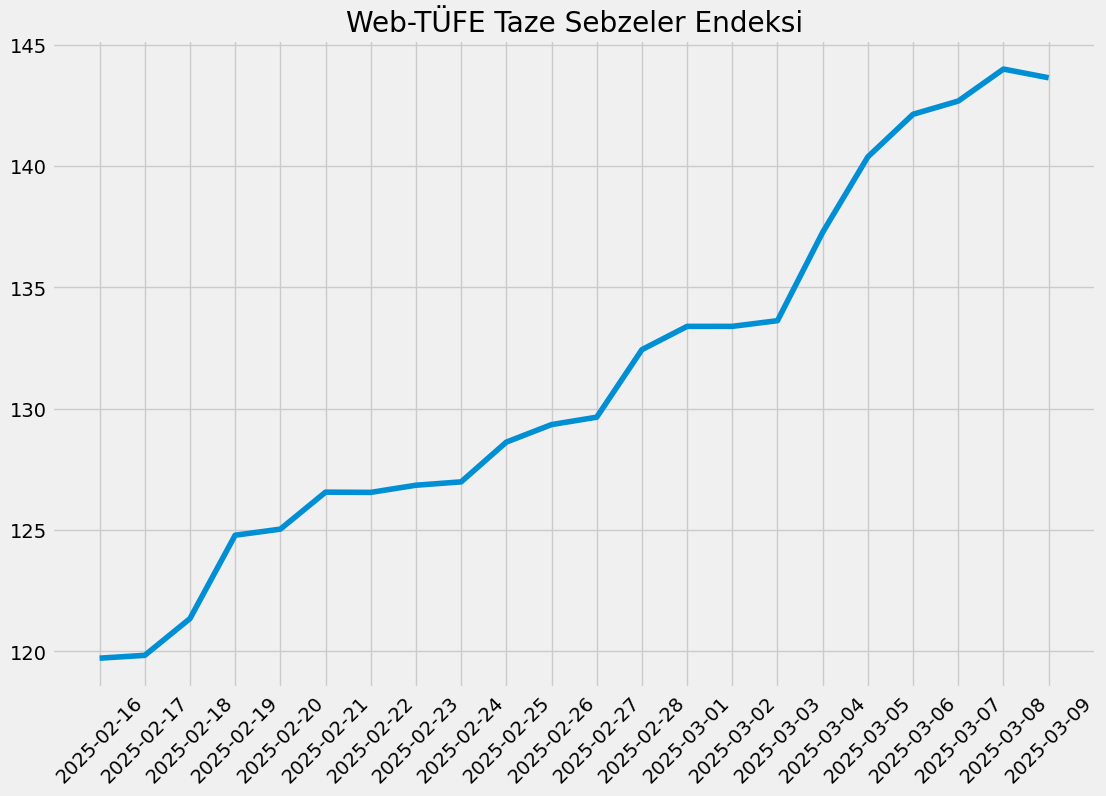

In [117]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-T√úFE Taze Sebzeler Endeksi")
plt.plot(weighted_indices["Taze sebzeler (patates hari√ß)"].loc["2025-02-16":])

plt.xticks(weighted_indices["Taze sebzeler (patates hari√ß)"].loc["2025-02-16":].index,rotation=45)

In [119]:
gfe.loc["2025-03"].mean()/gfe.loc["2025-02-01":"2025-02-24"].mean()

GFE    1.042608
dtype: float64

In [17]:
f=data1.loc["Fƒ±ndƒ±k Ezmesi"].drop_duplicates(["√úr√ºn"])
data1=data1.drop("Fƒ±ndƒ±k Ezmesi",axis=0)
data1=pd.concat([data1,f],axis=0)

In [18]:
data1.to_csv("sepet.csv")

In [81]:
import pandas as pd




import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
# Dosya yolundaki .xls uzantƒ±lƒ± dosyalarƒ±n isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["ƒ∞≈ülem Hacmi"]=df["ƒ∞≈ülem Hacmi"].astype(float)
    df["Hacimli"]=df["ƒ∞≈ülem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("√úr√ºn Adƒ±")
    df["Aƒüƒ±rlƒ±klƒ± Fiyat"]=df.groupby("√úr√ºn Adƒ±")["Hacimli"].sum()/df.groupby("√úr√ºn Adƒ±")["ƒ∞≈ülem Hacmi"].sum()
    df["√úr√ºn Adƒ±"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)

datam



√úr√ºn Cinsi                  √úr√ºn T√ºr√º  Ortalama Fiyat   
Tarih                                                                         
2025-03-09                  ACUR  Geleneksel(Konvansiyonel)           10.00  \
2025-03-09    ADA√áAYI (YA≈û-TAZE)  Geleneksel(Konvansiyonel)           61.50   
2025-03-09    ADA√áAYI (YA≈û-TAZE)                  ƒ∞yi Tarƒ±m           85.92   
2025-03-09     AHUDUDU(FRAMBUAZ)  Geleneksel(Konvansiyonel)         1841.00   
2025-03-09     AHUDUDU(FRAMBUAZ)                  ƒ∞yi Tarƒ±m         1035.70   
...                          ...                        ...             ...   
2025-03-09  YE≈ûƒ∞L KABUKLU FINDIK  Geleneksel(Konvansiyonel)           37.55   
2025-03-09           YE≈ûƒ∞L SOƒûAN  Geleneksel(Konvansiyonel)           46.30   
2025-03-09           YE≈ûƒ∞L SOƒûAN                  ƒ∞yi Tarƒ±m           28.70   
2025-03-09        YILDIZ MEYVESƒ∞                  ƒ∞yi Tarƒ±m          567.58   
2025-03-09              ZENCEFƒ∞L  Geleneksel(Konvansiyonel)          139.11   

            ƒ∞≈ülem Hacmi Birim Adƒ±     Hacimli  Aƒüƒ±rlƒ±klƒ± Fiyat   
Tarih                                                            
2025-03-09       1464.0        Kg    14640.00        10.000000  \
2025-03-09         81.0        Kg     4981.50        70.820611   
2025-03-09         50.0        Kg     4296.00        70.820611   
2025-03-09        102.0        Kg   187782.00      1153.887914   
2025-03-09        593.0        Kg   614170.10      1153.887914   
...                 ...       ...         ...              ...   
2025-03-09        417.0        Kg    15658.35        37.550000   
2025-03-09     169448.0        Kg  7845442.40        46.063396   
2025-03-09       2309.0        Kg    66268.30        46.063396   
2025-03-09         55.0        Kg    31216.90       567.580000   
2025-03-09       8958.0        Kg  1246147.38       139.110000   

                        √úr√ºn Adƒ±  
Tarih                             
2025-03-09                  ACUR  
2025-03-09    ADA√áAYI (YA≈û-TAZE)  
2025-03-09    ADA√áAYI (YA≈û-TAZE)  
2025-03-09     AHUDUDU(FRAMBUAZ)  
2025-03-09     AHUDUDU(FRAMBUAZ)  
...                          ...  
2025-03-09  YE≈ûƒ∞L KABUKLU FINDIK  
2025-03-09           YE≈ûƒ∞L SOƒûAN  
2025-03-09           YE≈ûƒ∞L SOƒûAN  
2025-03-09        YILDIZ MEYVESƒ∞  
2025-03-09              ZENCEFƒ∞L  

[415 rows x 8 columns]

In [82]:
datam=datam.sort_index()
datam=datam.iloc[:,[-1,-2]]
datam=datam.drop_duplicates(keep="first")

In [83]:
w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)


  
    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)
  

sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

Biber √áarliston verisi bulundu
Biber Dolmalƒ±k verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havu√ß verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soƒüan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kƒ±rmƒ±zƒ± Lahana verisi bulundu
Mantar verisi bulundu
Kƒ±vƒ±rcƒ±k verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlƒ±can verisi bulundu
Pƒ±rasa verisi bulundu
Roka verisi bulundu
Salatalƒ±k verisi bulundu
Sarƒ±msak verisi bulundu
turp verisi bulundu


In [84]:
w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:
    if sebze=="√áarliston Biber":
        sebze="Biber √áarliston"
    elif sebze=="Dolmalƒ±k Biber":
        sebze="Biber Dolmalƒ±k"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soƒüan":
        sebze="Soƒüan Kuru"
    elif sebze=="Kƒ±rmƒ±zƒ± Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["√úr√ºn Adƒ±"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Aƒüƒ±rlƒ±klƒ± Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)


  
    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)
  

meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index

Portakal verisi bulundu
√úz√ºm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
√áilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
≈ûeftali verisi bulundu


In [85]:
sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["√úr√ºn"]=f"HKS" + meyveler.index

In [86]:
data=pd.read_csv("sepet.csv",index_col=0)

In [87]:
data=data[~data["√úr√ºn"].str.contains("Ankara Hal|ƒ∞BB")]

In [ ]:
bug√ºn="2025-03-09"
for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)


In [95]:
data.to_csv("sepet.csv")

In [94]:
data.dropna(how="all")

√úr√ºn  2025-01-06   
Pasta                   Ala√ßatƒ± Damla Sakƒ±zlƒ± Kurabiye      119.95  \
Pasta    Ala√ßatƒ± Kurabiyecisi √áƒ±tƒ±r Top Kurabiye 180 G      119.95   
Pasta               Ala√ßatƒ± Simit Tuzlu Kurabiye 250 G      119.95   
Pasta            Ala√ßatƒ± Tahinli Cevizli Kurabiye 200G      119.95   
Pasta                   Ala√ßatƒ± Tahinli Kurabiye 250 G      119.95   
...                                                ...         ...   
≈ûeftali                                       √áilek kg         NaN   
≈ûeftali                                   ƒ∞thal Muz kg         NaN   
≈ûeftali                                     ≈ûeftali Kg       69.95   
≈ûeftali                            ≈ûeftali Nektarin Kg       69.95   
≈ûeftali                                     HKS≈ûeftali         NaN   

         2025-01-07  2025-01-09  2025-01-10  2025-01-11  2025-01-12   
Pasta        119.95      119.95      119.95      119.95      119.95  \
Pasta        119.95      119.95      119.95      119.95      119.95   
Pasta        119.95      119.95      119.95      119.95      119.95   
Pasta        119.95      119.95      119.95      119.95      119.95   
Pasta        119.95      119.95      119.95      119.95      119.95   
...             ...         ...         ...         ...         ...   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   
≈ûeftali       69.95       69.95       69.95       69.95       69.95   
≈ûeftali       69.95       69.95       69.95       69.95       69.95   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   

         2025-01-13  2025-01-14  2025-01-15  ...  2025-02-28  2025-03-01   
Pasta        119.95      119.95      119.95  ...         NaN         NaN  \
Pasta        119.95      119.95      119.95  ...         NaN         NaN   
Pasta        119.95      119.95      119.95  ...         NaN         NaN   
Pasta        119.95      119.95      119.95  ...         NaN         NaN   
Pasta        119.95      119.95      119.95  ...         NaN         NaN   
...             ...         ...         ...  ...         ...         ...   
≈ûeftali         NaN         NaN         NaN  ...         NaN         NaN   
≈ûeftali         NaN         NaN         NaN  ...       109.9       109.9   
≈ûeftali       69.95       69.95       69.95  ...         NaN         NaN   
≈ûeftali       69.95       69.95       69.95  ...         NaN         NaN   
≈ûeftali         NaN         NaN         NaN  ...         NaN         NaN   

         2025-03-02  2025-03-03  2025-03-04  2025-03-05  2025-03-06   
Pasta           NaN         NaN         NaN         NaN         NaN  \
Pasta           NaN         NaN         NaN         NaN         NaN   
Pasta           NaN         NaN         NaN         NaN         NaN   
Pasta           NaN         NaN         NaN         NaN         NaN   
Pasta           NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
≈ûeftali       199.9         NaN         NaN         NaN         NaN   
≈ûeftali       109.9       109.9       109.9       109.9         NaN   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   
≈ûeftali         NaN         NaN         NaN         NaN         NaN   

         2025-03-07  2025-03-08  2025-03-09  
Pasta           NaN         NaN         NaN  
Pasta           NaN         NaN         NaN  
Pasta           NaN         NaN         NaN  
Pasta           NaN         NaN         NaN  
Pasta           NaN         NaN         NaN  
...             ...         ...         ...  
≈ûeftali         NaN         NaN         NaN  
≈ûeftali         NaN  109.900000       109.9  
≈ûeftali         NaN         NaN         NaN  
≈ûeftali         NaN         NaN         NaN  
≈ûeftali         NaN   28.667751   20.

In [407]:
sebzeler=sebzeler.iloc[:,402:]

In [408]:
sebzeler=sebzeler.drop("2025-01-08",axis=1)
sebzeler["√úr√ºn"]=f"HKS" + sebzeler.index

In [409]:
cols=["√úr√ºn"]
cols.extend(sebzeler.columns[:-1])
sebzeler=sebzeler[cols]


In [410]:
data=pd.concat([data,sebzeler[cols]],axis=0).sort_index()
data

√úr√ºn  2025-01-06  2025-01-07   
Antep Fƒ±stƒ±ƒüƒ±      Migros Antep Fƒ±stƒ±ƒüƒ± Jumbo 200 G      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±            Tadƒ±m Antep Fƒ±stƒ±ƒüƒ± 180 gr         NaN         NaN   
Antep Fƒ±stƒ±ƒüƒ±             Tadƒ±m Antep Fƒ±stƒ±ƒüƒ± 180 G      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±            Tadƒ±m Antep Fƒ±stƒ±ƒüƒ± 122 gr         NaN         NaN   
Antep Fƒ±stƒ±ƒüƒ±  Migros Kavrulmu≈ü Antep Fƒ±stƒ±ƒüƒ± 150 G       99.50       99.50   
...                                             ...         ...         ...   
≈ûehriye                    Mutlu Arpa ≈ûehriye 500 G       19.50       19.50   
≈ûehriye                    Migros Tel ≈ûehriye 500 G       11.75       11.75   
≈ûehriye                   Migros Tel ≈ûehriye  500 G       11.75       11.75   
≈ûehriye                   Migros Arpa ≈ûehriye 500 G       11.75       11.75   
≈ûehriye                    Filiz Arpa ≈ûehriye 500 G       22.75       22.75   

               2025-01-09  2025-01-10  2025-01-11  2025-01-12  2025-01-13   
Antep Fƒ±stƒ±ƒüƒ±      143.00      143.00      143.00      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Antep Fƒ±stƒ±ƒüƒ±      187.95      187.95      187.95      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Antep Fƒ±stƒ±ƒüƒ±       99.50       99.50       99.50       99.50       99.50   
...                   ...         ...         ...         ...         ...   
≈ûehriye             19.50       19.50       19.50       19.50       19.50   
≈ûehriye             11.75       11.75       11.75       11.75       11.75   
≈ûehriye             11.75       11.75       11.75       11.75       11.75   
≈ûehriye             11.75       11.75       11.75       11.75       11.75   
≈ûehriye             22.75       22.75       22.75       22.75       22.75   

               2025-01-14  2025-01-15  ...  2025-03-01  2025-03-02   
Antep Fƒ±stƒ±ƒüƒ±      143.00      143.00  ...      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN  ...      216.20      216.20   
Antep Fƒ±stƒ±ƒüƒ±      187.95      187.95  ...      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN  ...      147.20      147.20   
Antep Fƒ±stƒ±ƒüƒ±       99.50       99.50  ...       99.50       99.50   
...                   ...         ...  ...         ...         ...   
≈ûehriye             19.50       19.50  ...         NaN         NaN   
≈ûehriye             11.75       11.75  ...         NaN         NaN   
≈ûehriye             11.75       11.75  ...       12.95       12.95   
≈ûehriye             11.75       11.75  ...         NaN         NaN   
≈ûehriye             22.75       22.75  ...         NaN         NaN   

               2025-03-03  2025-03-04  2025-03-05  2025-03-06  2025-03-07   
Antep Fƒ±stƒ±ƒüƒ±      143.00      143.00      143.00      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±      216.20      216.20      216.20      216.20      216.20   
Antep Fƒ±stƒ±ƒüƒ±      187.95      187.95      187.95      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±      147.20      147.20      147.20      147.20      147.20   
Antep Fƒ±stƒ±ƒüƒ±       99.50       99.50       99.50       99.50       99.50   
...                   ...         ...         ...         ...         ...   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye             12.95       12.95       12.95       12.95       12.95   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   

               2025-03-08  2025-02-17  2025-02-18  
Antep Fƒ±stƒ±ƒüƒ±      143.00         NaN         NaN  
Antep Fƒ±stƒ±ƒüƒ±      216.20         NaN         NaN  
Antep Fƒ±stƒ±ƒüƒ±      187.95         NaN         NaN  
Antep Fƒ±stƒ±ƒüƒ±      147.20         NaN         NaN  


In [417]:
data.iloc[:,-36:]

2025-02-01  2025-02-02  2025-02-03  2025-02-04  2025-02-05   
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN         NaN         NaN         NaN  \
Antep Fƒ±stƒ±ƒüƒ±      210.55      210.55      210.55      210.55      210.55   
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN         NaN         NaN         NaN   
Antep Fƒ±stƒ±ƒüƒ±      143.35      143.35      143.35      143.35      143.35   
Antep Fƒ±stƒ±ƒüƒ±         NaN         NaN         NaN         NaN         NaN   
...                   ...         ...         ...         ...         ...   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye             12.95       12.95       12.95       12.95       12.95   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   

               2025-02-06  2025-02-07  2025-02-08  2025-02-09  2025-02-10   
Antep Fƒ±stƒ±ƒüƒ±      143.00      143.00      143.00      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±      210.55      210.55      210.55      210.55      210.55   
Antep Fƒ±stƒ±ƒüƒ±      187.95      187.95      187.95      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±      143.35      143.35      143.35      143.35      143.35   
Antep Fƒ±stƒ±ƒüƒ±       99.50       99.50       99.50       99.50       99.50   
...                   ...         ...         ...         ...         ...   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye             12.95       12.95       12.95       12.95       12.95   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   

               ...  2025-03-01  2025-03-02  2025-03-03  2025-03-04   
Antep Fƒ±stƒ±ƒüƒ±  ...      143.00      143.00      143.00      143.00  \
Antep Fƒ±stƒ±ƒüƒ±  ...      216.20      216.20      216.20      216.20   
Antep Fƒ±stƒ±ƒüƒ±  ...      187.95      187.95      187.95      187.95   
Antep Fƒ±stƒ±ƒüƒ±  ...      147.20      147.20      147.20      147.20   
Antep Fƒ±stƒ±ƒüƒ±  ...       99.50       99.50       99.50       99.50   
...            ...         ...         ...         ...         ...   
≈ûehriye        ...         NaN         NaN         NaN         NaN   
≈ûehriye        ...         NaN         NaN         NaN         NaN   
≈ûehriye        ...       12.95       12.95       12.95       12.95   
≈ûehriye        ...         NaN         NaN         NaN         NaN   
≈ûehriye        ...         NaN         NaN         NaN         NaN   

               2025-03-05  2025-03-06  2025-03-07  2025-03-08  2025-02-17   
Antep Fƒ±stƒ±ƒüƒ±      143.00      143.00      143.00      143.00         NaN  \
Antep Fƒ±stƒ±ƒüƒ±      216.20      216.20      216.20      216.20         NaN   
Antep Fƒ±stƒ±ƒüƒ±      187.95      187.95      187.95      187.95         NaN   
Antep Fƒ±stƒ±ƒüƒ±      147.20      147.20      147.20      147.20         NaN   
Antep Fƒ±stƒ±ƒüƒ±       99.50       99.50       99.50       99.50         NaN   
...                   ...         ...         ...         ...         ...   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye             12.95       12.95       12.95       12.95         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   
≈ûehriye               NaN         NaN         NaN         NaN         NaN   

               2025-02-18  
Antep Fƒ±stƒ±ƒüƒ±         NaN  
Antep Fƒ±stƒ±ƒüƒ±         NaN  
Antep Fƒ±stƒ±ƒüƒ±         NaN  
Antep Fƒ±stƒ±ƒüƒ±         NaN  
Antep Fƒ±stƒ±ƒüƒ±         NaN  
...                   ...  
≈ûehriye               NaN  
≈ûehriye               NaN  
≈ûehriye               Na

In [427]:
aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=data.copy()
data1=data1.iloc[:,:-2]


data1=data1.drop_duplicates() 
degisim=data1.iloc[:,1:].pct_change(axis=1)+1

from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,1:].pct_change(axis=1)+1)).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()






In [435]:
aƒüƒ±rlƒ±klar

Unnamed: 0.1  Unnamed: 0   Aƒüƒ±rlƒ±k   Deƒüi≈üim   
√úr√ºn                                                            
Antep Fƒ±stƒ±ƒüƒ±               0           0  0.001857  0.000000  \
Armut                       1           1  0.002484  0.780701   
Ay √áekirdeƒüi                2           2  0.006820  0.001921   
Ayran                       3           3  0.001662  0.000000   
Ayva                        4           4  0.000922  0.013446   
...                       ...         ...       ...       ...   
√áikolata Tablet           123         123  0.011459  0.022641   
√áilek                     124         124  0.003439 -0.654022   
√úz√ºm                      125         125  0.006461  0.000000   
≈ûeftali                   126         126  0.003393  1.188870   
≈ûehriye                   127         127  0.001402  0.007910   

                 Endeks_2024-10-31  Aƒüƒ±rlƒ±klƒ± Endeks_2024-10-31   
√úr√ºn                                                              
Antep Fƒ±stƒ±ƒüƒ±                100.0                     0.185691  \
Armut                        100.0                     0.248447   
Ay √áekirdeƒüi                 100.0                     0.682045   
Ayran                        100.0                     0.166171   
Ayva                         100.0                     0.092174   
...                            ...                          ...   
√áikolata Tablet              100.0                     1.145925   
√áilek                        100.0                     0.343934   
√úz√ºm                         100.0                     0.646115   
≈ûeftali                      100.0                     0.339330   
≈ûehriye                      100.0                     0.140239   

                 Endeks_2024-11-01  Aƒüƒ±rlƒ±klƒ± Endeks_2024-11-01   
√úr√ºn                                                              
Antep Fƒ±stƒ±ƒüƒ±           100.000000                     0.185691  \
Armut                    99.663073                     0.247610   
Ay √áekirdeƒüi             98.857143                     0.674250   
Ayran                   100.000000                     0.166171   
Ayva                    100.000000                     0.092174   
...                            ...                          ...   
√áikolata Tablet         100.000000                     1.145925   
√áilek                   100.000000                     0.343934   
√úz√ºm                    100.000000                     0.646115   
≈ûeftali                 100.000000                     0.339330   
≈ûehriye                 100.345404                     0.140723   

                 Endeks_2024-11-02  Aƒüƒ±rlƒ±klƒ± Endeks_2024-11-02  ...   
√úr√ºn                                                             ...   
Antep Fƒ±stƒ±ƒüƒ±           100.000000                     0.185691  ...  \
Armut                    99.663073                     0.247610  ...   
Ay √áekirdeƒüi             98.857143                     0.674250  ...   
Ayran                   100.000000                     0.166171  ...   
Ayva                    100.000000                     0.092174  ...   
...                            ...                          ...  ...   
√áikolata Tablet         100.000000                     1.145925  ...   
√áilek                   100.000000                     0.343934  ...   
√úz√ºm                    100.000000                     0.646115  ...   
≈ûeftali                 100.000000                     0.339330  ...   
≈ûehriye                 100.345404                     0.140723  ...   

                 Endeks_2025-03-04  Aƒüƒ±rlƒ±klƒ± Endeks_2025-03-04   
√úr√ºn                                                              
Antep Fƒ±stƒ±ƒüƒ±           103.498494                     0.192187  \
Armut                   100.042928                     0.248554   
Ay √áekirdeƒüi            104.011844                     0.709407   
Ayran                   120.926818                     0.200946   
Ayv

In [456]:
gfe.loc["2025-01-06":]

GFE
Tarih                 
2025-01-06  108.460554
2025-01-07  108.690986
2025-01-08  109.150418
2025-01-09  109.312913
2025-01-10  109.266689
...                ...
2025-03-04  116.943544
2025-03-05  117.598200
2025-03-06  117.952234
2025-03-07  118.067570
2025-03-08  118.294517

[62 rows x 1 columns]

In [455]:
((np.array(deg)/100)+1).prod()

1.0842097824500014

In [449]:
deg=[]
for i in range(1,len(degisim.columns)):
    deg.append((degisim.iloc[:,i]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]).sum())



In [232]:
aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.loc[w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values]
aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"].sum()
aƒüƒ±rlƒ±klar

Unnamed: 0.1  Unnamed: 0   Aƒüƒ±rlƒ±k   Deƒüi≈üim  Endeks_2024-10-31   
√úr√ºn                                                                         
Portakal             88          88  0.096296  0.782870              100.0  \
√úz√ºm                125         125  0.081864  0.000000              100.0   
Armut                 1           1  0.031479  0.780701              100.0   
Ayva                  4           4  0.011679  0.013446              100.0   
√áilek               124         124  0.043577 -0.654022              100.0   
Elma                 27          27  0.131617  0.844521              100.0   
Karpuz               46          46  0.135227  0.000000              100.0   
Kavun                47          47  0.062159  0.013446              100.0   
Kivi                 53          53  0.009339  1.251251              100.0   
Limon                68          68  0.065998  0.477855              100.0   
Mandalina            72          72  0.091192  0.000000              100.0   
Muz                  79          79  0.180481  0.000000              100.0   
Nar                  81          81  0.016096 -0.794092              100.0   
≈ûeftali             126         126  0.042994  1.188870              100.0   

           Aƒüƒ±rlƒ±klƒ± Endeks_2024-10-31  Endeks_2024-11-01   
√úr√ºn                                                        
Portakal                      0.760018         100.000000  \
√úz√ºm                          0.646115         100.000000   
Armut                         0.248447          99.663073   
Ayva                          0.092174         100.000000   
√áilek                         0.343934         100.000000   
Elma                          1.038787         100.000000   
Karpuz                        1.067280         100.000000   
Kavun                         0.490588         100.000000   
Kivi                          0.073712         100.000000   
Limon                         0.520887         100.000000   
Mandalina                     0.719731         101.361386   
Muz                           1.424447         100.000000   
Nar                           0.127040         100.000000   
≈ûeftali                       0.339330         100.000000   

           Aƒüƒ±rlƒ±klƒ± Endeks_2024-11-01  Endeks_2024-11-02   
√úr√ºn                                                        
Portakal                      0.760018         100.000000  \
√úz√ºm                          0.646115         100.000000   
Armut                         0.247610          99.663073   
Ayva                          0.092174         100.000000   
√áilek                         0.343934         100.000000   
Elma                          1.038787         100.000000   
Karpuz                        1.067280         100.000000   
Kavun                         0.490588         100.000000   
Kivi                          0.073712         100.000000   
Limon                         0.520887         100.000000   
Mandalina                     0.729530         101.361386   
Muz                           1.424447         100.000000   
Nar                           0.127040         100.000000   
≈ûeftali                       0.339330         100.000000   

           Aƒüƒ±rlƒ±klƒ± Endeks_2024-11-02  ...  Endeks_2025-03-04   
√úr√ºn                                    ...                      
Portakal                      0.760018  ...         124.071745  \
√úz√ºm                          0.646115  ...         103.029597   
Armut                         0.247610  ...         100.042928   
Ayva                          0.092174  ...         113.887780   
√áilek                         0.343934  ...         128.282827   
Elma                          1.038787  ...         112.989852   
Karpuz                        1.067280  ...         130.769231   
Kavun                         0.490588  ...         147.025827   
Kivi                          0.073712  ...         114.470998   
Limon                         0.520887  ..

In [235]:
meyveenf2=[]
for i in range(397,len(meyveler.columns)):
    meyveenf2.append((meyveler.iloc[:,i]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"].values).sum())
meyveenf2=pd.DataFrame(meyveenf2)
meyveenf2=meyveenf2.set_index(pd.date_range(start="2025-01-01",freq="D",periods=len(meyveenf2)))
meyveenf2

0
2025-01-01  49.433870
2025-01-02  56.301638
2025-01-03  63.239499
2025-01-04  52.835702
2025-01-05  66.242028
...               ...
2025-03-04  64.651994
2025-03-05  58.184456
2025-03-06  75.796935
2025-03-07  68.450731
2025-03-08  60.067278

[67 rows x 1 columns]

In [328]:
meyve=pd.concat([meyveenf,meyveenf2],axis=0)

In [219]:
enf=pd.concat([enf,enf2],axis=0)

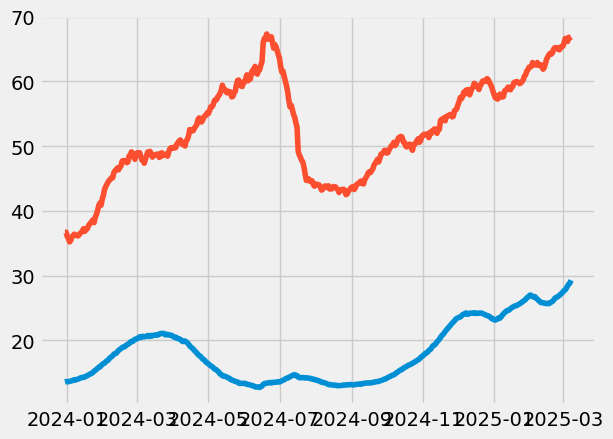

In [329]:
plt.plot(enf.rolling(30).mean())
plt.plot(meyve.rolling(30).mean())

In [287]:
sebze=enf.resample('M').mean().pct_change().dropna()*100
meyve=meyve.resample('M').mean().pct_change().dropna()*100

In [283]:
enf.resample('M').mean().pct_change(12).dropna()*100

0
2024-12-31  71.236189
2025-01-31  64.669877
2025-02-28  35.346072
2025-03-31  56.482853

In [313]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data.columns=data.iloc[2]
data=data.iloc[4:]
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
t√ºik=data[["Taze meyveler","Taze sebzeler (patates hari√ß)"]].pct_change().dropna().loc["2024":]*100

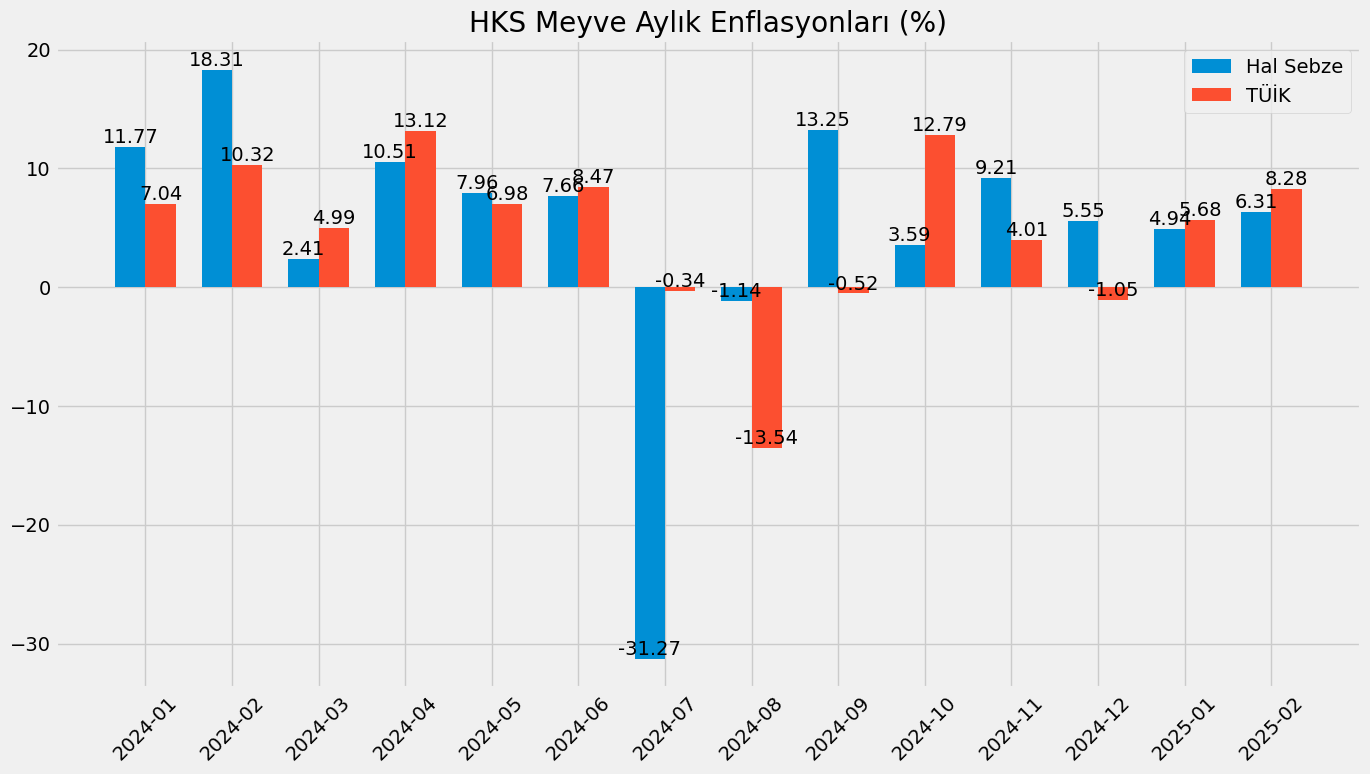

In [324]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 8))
plt.title("HKS Meyve Aylƒ±k Enflasyonlarƒ± (%)")

# Define the bar width
bar_width = 0.35

# Define the x positions for each bar group
x_sebze = np.arange(len(meyve[:-1]))
x_meyve = x_sebze + bar_width # Offset for 'meyve' bars

# Plot the 'sebze' data
plt.bar(x_sebze, meyve.values.flatten()[:-1], width=bar_width, label='Hal Sebze')

# Plot the 'meyve' data
plt.bar(x_meyve, t√ºik["Taze meyveler"].values.flatten(), width=bar_width, label='T√úƒ∞K')

# Add the values above the bars
for i, value in enumerate(meyve.values.flatten()[:-1]):
    plt.text(x_sebze[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(t√ºik["Taze meyveler"].values.flatten()):
    plt.text(x_meyve[i], value, f'{value:.2f}', ha='center', va='bottom')

meyve.index = pd.to_datetime(meyve.index)  # Ensure index is datetime if not already
plt.xticks(x_sebze + bar_width / 2, meyve.index.strftime('%Y-%m')[:-1], rotation=45)

# Add a legend to differentiate the bars
plt.legend()

plt.show()  # Display the plot


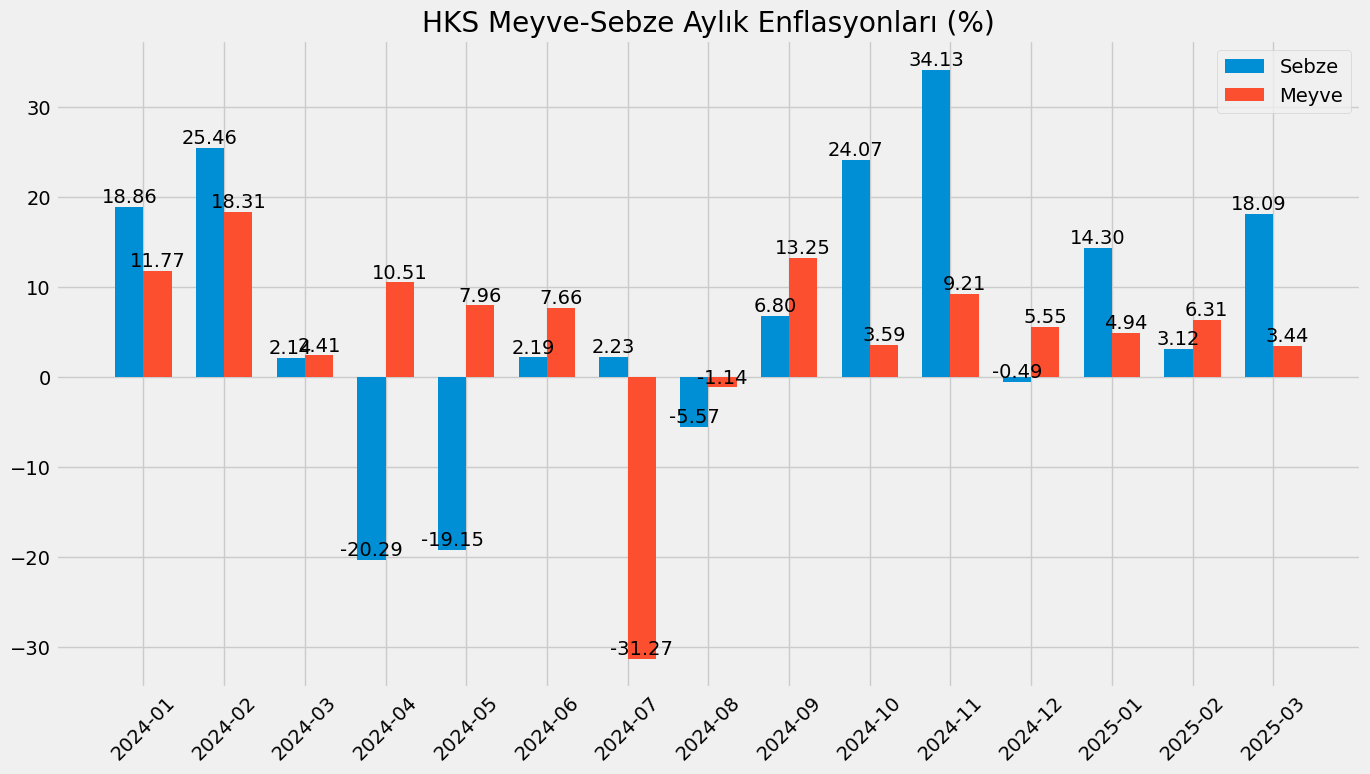

In [292]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 8))
plt.title("HKS Meyve-Sebze Aylƒ±k Enflasyonlarƒ± (%)")

# Define the bar width
bar_width = 0.35

# Define the x positions for each bar group
x_sebze = np.arange(len(sebze))
x_meyve = x_sebze + bar_width # Offset for 'meyve' bars

# Plot the 'sebze' data
plt.bar(x_sebze, sebze.values.flatten(), width=bar_width, label='Sebze')

# Plot the 'meyve' data
plt.bar(x_meyve, meyve.values.flatten(), width=bar_width, label='Meyve')

# Add the values above the bars
for i, value in enumerate(sebze.values.flatten()):
    plt.text(x_sebze[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(meyve.values.flatten()):
    plt.text(x_meyve[i], value, f'{value:.2f}', ha='center', va='bottom')

sebze.index = pd.to_datetime(sebze.index)  # Ensure index is datetime if not already
plt.xticks(x_sebze + bar_width / 2, sebze.index.strftime('%Y-%m'), rotation=45)

# Add a legend to differentiate the bars
plt.legend()

plt.show()  # Display the plot


In [ ]:

# WebDriver'ƒ± ba≈ülat
driver = webdriver.Chrome()  # veya kullandƒ±ƒüƒ±nƒ±z tarayƒ±cƒ±ya uygun WebDriver'ƒ± se√ßin
driver.get("https://www.ankara.bel.tr/hal-fiyatlari")

# Ba≈ülangƒ±√ß tarihini belirle
start_date = datetime.now()

# Verileri saklamak i√ßin bo≈ü bir liste olu≈ütur
all_data = []

# 7 g√ºn boyunca verileri √ßek
for i in range(1):
    # Ba≈ülangƒ±√ß tarihini hesapla
    current_start_date = start_date 
    current_start_date_str = current_start_date.strftime("%d.%m.%Y")

    # Biti≈ü tarihini hesapla (7 g√ºn sonra)
    end_date = current_start_date 
    end_date_str = end_date.strftime("%d.%m.%Y")

    # Ba≈ülangƒ±√ß tarihini girin
    start_date_input = driver.find_element(By.NAME, "start_date")
    start_date_input.clear()
    start_date_input.send_keys(current_start_date_str)

    # Biti≈ü tarihini girin
    end_date_input = driver.find_element(By.NAME, "end_date")
    end_date_input.clear()
    end_date_input.send_keys(end_date_str)

    # Arama butonuna tƒ±klayƒ±n
    search_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-primary")
    search_button.click()

    # Sayfanƒ±n y√ºklenmesini bekleyin
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "table-responsive"))
    )

    # Tablodaki verileri √ßek
    table = driver.find_element(By.CLASS_NAME, "table-responsive")
    rows = table.find_elements(By.TAG_NAME, "tr")

    # Tablodaki verileri oku ve listeye ekle
    for row in rows:
        cols = row.find_elements(By.TAG_NAME, "td")
        if cols:  # Sadece veri satƒ±rlarƒ±nƒ± al (ba≈ülƒ±k satƒ±rƒ±nƒ± atla)
            row_data = [col.text for col in cols]
            row_data.append(current_start_date_str)  # Tarih bilgisini ekle
            all_data.append(row_data)

# WebDriver'ƒ± kapat
driver.quit()

# Verileri DataFrame'e d√∂n√º≈üt√ºr
columns = ["Cinsi", "Birim", "Asgari (‚Ç∫)", "Azami (‚Ç∫)", "Tarih","Biti≈ü"]
try:
    df = pd.DataFrame(all_data, columns=columns)

    df["Asgari (‚Ç∫)"]=df["Asgari (‚Ç∫)"].str.replace(",",".").astype(float)
    df["Azami (‚Ç∫)"]=df["Azami (‚Ç∫)"].str.replace(",",".").astype(float)
    df["Fiyat"]=0.5*df["Asgari (‚Ç∫)"]+0.5*df["Azami (‚Ç∫)"]
    sebzeler=pd.DataFrame()
    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    df=df[["Cinsi","Fiyat","Tarih"]]
    df=df.sort_index()
    df["Tarih"] = pd.to_datetime(df["Tarih"],dayfirst=True).dt.strftime("%Y-%m-%d")
    df=df.set_index("Tarih")
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hari√ß)"]["Unnamed: 1"].values:
        hal=pd.DataFrame(df[df["Cinsi"].str.contains(sebze)]).groupby(level=0)["Fiyat"].mean()
        hal=pd.DataFrame(hal)
        hal=hal.sort_index()
        hal=hal.T
        hal=hal[np.sort(hal.columns.values)]
        hal["√úr√ºn"]=f"Ankara Hal {sebze}"
        hal=hal.reset_index()
        hal.index.name=None
        hal.columns.name = None
        del hal["index"]
        hal.index=[f"{sebze}"]
        sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']


        hal = hal[sira]
        if hal.shape[1]>1:
            print(f"{sebze} verisi bulundu")
            sebzeler=pd.concat([sebzeler,hal],axis=0)
        else:
            print(f"{sebze} verisi yok")
    sebzeler=sebzeler[np.sort(sebzeler.columns.values)]

    sira = ['√úr√ºn'] + [col for col in sebzeler.columns if col != '√úr√ºn']


    sebzeler = sebzeler[sira]

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data=veriekle(sebze,data,urunler_df)


    dolma=df[df["Cinsi"].str.contains("√áarliston")].groupby(level=0)["Fiyat"].mean()
    sebze="√áarliston Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]

    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Biber Dolma")].groupby(level=0)["Fiyat"].mean()
    sebze="Dolmalƒ±k Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Biber Sivri")].groupby(level=0)["Fiyat"].mean()
    sebze="Sivri Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Fasulye")].groupby(level=0)["Fiyat"].mean()
    sebze="Taze Fasulye"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Soƒüan Kuru")].groupby(level=0)["Fiyat"].mean()
    sebze="Kuru Soƒüan"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Lahana")) & (df["Cinsi"].str.contains("Beyaz"))].groupby(level=0)["Fiyat"].mean()
    sebze="Beyaz Lahana"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Lahana")) & (df["Cinsi"].str.contains("Kƒ±rmƒ±zƒ±"))].groupby(level=0)["Fiyat"].mean()
    sebze="Kƒ±rmƒ±zƒ± Lahana"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]

    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Turp")) & (df["Cinsi"].str.contains("Kƒ±rmƒ±zƒ±"))].groupby(level=0)["Fiyat"].mean()
    sebze="Kƒ±rmƒ±zƒ± Turp"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["√úr√ºn"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    meyveler=pd.DataFrame()
    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:
        hal=pd.DataFrame(df[df["Cinsi"].str.contains(meyve)]).groupby(level=0)["Fiyat"].mean()
        hal=pd.DataFrame(hal)
        hal=hal.sort_index()
        hal=hal.T
        hal=hal[np.sort(hal.columns.values)]
        hal["√úr√ºn"]=f"Ankara Hal {meyve}"
        hal=hal.reset_index()
        hal.index.name=None
        hal.columns.name = None
        del hal["index"]
        hal.index=[f"{meyve}"]
        sira = ['√úr√ºn'] + [col for col in hal.columns if col != '√úr√ºn']


        hal = hal[sira]
        if hal.shape[1]>1:
            print(f"{meyve} verisi bulundu")
            meyveler=pd.concat([meyveler,hal],axis=0)
        else:
            print(f"{meyve} verisi yok")

    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data=veriekle(meyve,data,urunler_df)

except:
    pass





























































for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                


data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv")
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.set_index(aƒüƒ±rlƒ±klar["√úr√ºn"])
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.drop("√úr√ºn",axis=1)
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)+1
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=aƒüƒ±rlƒ±klar.loc[temp1.index]
df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Aƒüƒ±rlƒ±k"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




aƒüƒ±rlƒ±klar["Deƒüi≈üim"]=degisim



aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{d√ºn}"]*(1+(aƒüƒ±rlƒ±klar["Deƒüi≈üim"]/100))

aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"]=aƒüƒ±rlƒ±klar[f"Endeks_{bug√ºn}"]*aƒüƒ±rlƒ±klar["Aƒüƒ±rlƒ±k"]
gfe.loc[pd.to_datetime(bug√ºn)]=aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = aƒüƒ±rlƒ±klar[f"Aƒüƒ±rlƒ±klƒ± Endeks_{bug√ºn}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = aƒüƒ±rlƒ±klar.filter(like='Endeks_')
endeksler = [col for col in aƒüƒ±rlƒ±klar.columns if col.startswith('Endeks_')]
aƒüƒ±rlƒ±klar[endeksler].to_csv("endeksler.csv",index=True)


aƒüƒ±rlƒ±klar.to_csv("aƒüƒ±rlƒ±klar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["√úr√ºn"])
endeksler=endeksler.drop("√úr√ºn",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


√ºr√ºnler=pd.read_csv("harcama√ºr√ºnleri1.csv")
√ºr√ºnler=√ºr√ºnler[√ºr√ºnler["Ana Grup"]=="Gƒ±da ve alkols√ºz i√ßecekler"]
√ºr√ºnler=√ºr√ºnler.sort_values(by="Grup")
√ºr√ºnler["Aƒüƒ±rlƒ±k"]=√ºr√ºnler["Aƒüƒ±rlƒ±k"]/√ºr√ºnler["Aƒüƒ±rlƒ±k"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in √ºr√ºnler["Grup"].unique():
    df=√ºr√ºnler[√ºr√ºnler["Grup"]==grup]
    df["Aƒüƒ±rlƒ±k"]=df["Aƒüƒ±rlƒ±k"]/df["Aƒüƒ±rlƒ±k"].sum()
    grupendeks=(endeksler[df["√úr√ºn"].sort_index()]*df.set_index("√úr√ºn")["Aƒüƒ±rlƒ±k"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini olu≈ütur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: t√ºm deƒüi≈üiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile t√ºm dosyalar eklenir

        # Commit i≈ülemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit i≈ülemi ba≈üarƒ±lƒ±: {commit_message}")

        # Push i≈ülemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push i≈ülemi ba≈üarƒ±lƒ±.")

    except Exception as e:
        print(f"Git i≈ülemi sƒ±rasƒ±nda hata olu≈ütu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
aƒüƒ±rlƒ±k=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[:,[0,1,3]]
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.dropna()
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k.iloc[1:]
aƒüƒ±rlƒ±k.columns=["Kod","Madde","Aƒüƒ±rlƒ±k"]
data=data[aƒüƒ±rlƒ±k["Kod"].values]
data.columns=aƒüƒ±rlƒ±k["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
aƒüƒ±rlƒ±k=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(weighted_indices.columns)]
aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k["Aƒüƒ±rlƒ±k"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hari√ß)"]]
aƒüƒ±rlƒ±k_meyvesebze=aƒüƒ±rlƒ±k[aƒüƒ±rlƒ±k["Madde"].isin(gfe_meyvesebze.columns)]
aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*aƒüƒ±rlƒ±k_meyvesebze["Aƒüƒ±rlƒ±k"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Deƒüi≈üim"]=0 

endekslerr=endeksler.copy()

aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.sort_index()
del aƒüƒ±rlƒ±klar["Unnamed: 0"]
aƒüƒ±rlƒ±klar["√úr√ºn"]=aƒüƒ±rlƒ±klar.index
meyvesebzeharic=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)]["√úr√ºn"].values

aƒüƒ±rlƒ±k_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebzeharic)]
aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*aƒüƒ±rlƒ±k_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




i≈ülenmemi≈ü_gƒ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta",'Portakal', '√úz√ºm', 'Armut', 'Ayva', '√áilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', '≈ûeftali','√áarliston Biber', 'Dolmalƒ±k Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havu√ß', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soƒüan', 'Beyaz Lahana', 'Kƒ±rmƒ±zƒ± Lahana',
'Mantar', 'Kƒ±vƒ±rcƒ±k', 'Maydanoz', 'Nane', 'Patlƒ±can', 'Pƒ±rasa',
'Roka', 'Salatalƒ±k', 'Sarƒ±msak', 'Kƒ±rmƒ±zƒ± Turp']

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da=pd.DataFrame(i≈ülenmemi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da=i≈ülenmemi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da)))


i≈ülenmemi≈ü_gƒ±da1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmemi≈ü_gƒ±da1)]
aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmemi≈ügƒ±da_msharic=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmemi≈ügƒ±da_msharic.append((endekslerr[range].loc[i≈ülenmemi≈ü_gƒ±da1].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmemi≈ügƒ±da_meyvesebzeharic["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmemi≈ügƒ±da_msharic=pd.DataFrame(i≈ülenmemi≈ügƒ±da_msharic,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmemi≈ügƒ±da_msharic=i≈ülenmemi≈ügƒ±da_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmemi≈ügƒ±da_msharic)))


i≈ülenmi≈ü_gƒ±da=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Bulgur', 'Buƒüday Unu', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(i≈ülenmi≈ü_gƒ±da)]
aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sum()

i≈ülenmi≈ügƒ±da=[]
for range in endekslerr.columns[:-1]:
    
    i≈ülenmi≈ügƒ±da.append((endekslerr[range].loc[i≈ülenmi≈ü_gƒ±da].sort_index()*aƒüƒ±rlƒ±k_i≈ülenmi≈ügƒ±da["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
i≈ülenmi≈ügƒ±da=pd.DataFrame(i≈ülenmi≈ügƒ±da,index=endekslerr.columns[:-1],columns=["ƒ∞≈ülenmemi≈ü Gƒ±da"])
i≈ülenmi≈ügƒ±da=i≈ülenmi≈ügƒ±da.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(i≈ülenmi≈ügƒ±da)))



ekmek_tahƒ±l=['Ekmek','Buƒüday Unu',"Bulgur"]


aƒüƒ±rlƒ±k_ekmektahƒ±l=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(ekmek_tahƒ±l)]
aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sum()

ekmektahƒ±l=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahƒ±l.append((endekslerr[range].loc[ekmek_tahƒ±l].sort_index()*aƒüƒ±rlƒ±k_ekmektahƒ±l["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
ekmektahƒ±l=pd.DataFrame(ekmektahƒ±l,index=endekslerr.columns[:-1],columns=["Ekmek ve diƒüer tahƒ±llar"])
ekmektahƒ±l=ekmektahƒ±l.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahƒ±l)))




diƒüer_i≈ülenmi≈ü=['Antep Fƒ±stƒ±ƒüƒ±', 'Ay √áekirdeƒüi', 'Ayran', 'Ay√ßi√ßek Yaƒüƒ±',
'Badem ƒ∞√ßi', 'Baharat', 'Baklava', 'Bal',
'Bebek S√ºt√º (Toz Karƒ±≈üƒ±m)', 'Beyaz Peynir', 'Bisk√ºvi',
'Bitki ve Meyve √áayƒ± (Po≈üet)', 'Ceviz ƒ∞√ßi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fƒ±ndƒ±k Ezmesi', 'Fƒ±ndƒ±k ƒ∞√ßi', 'Gazoz Meyveli', 'Gofret',
'Hazƒ±r Et Yemekleri', 'Hazƒ±r Kahve',
'Hazƒ±r Pakette Toz Tatlƒ±lar (Puding)', 'Hazƒ±r S√ºtl√º Tatlƒ±lar',
'Hazƒ±r √áorbalar', 'Kabak √áekirdeƒüi', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz ƒ∞√ßecekler', 'Kaƒüƒ±tlƒ± ≈ûeker', 'Ka≈üar Peyniri',
'Kek', 'Kesme ≈ûeker', 'Ket√ßap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayƒ±sƒ±', 'Kuru √úz√ºm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodasƒ±', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirin√ß', 'Re√ßel', 'Sakƒ±z', 'Salam', 'Sal√ßa', 'Sirke',
'Sosis', 'Soƒüuk √áay', 'Su', 'Sucuk', 'S√ºt', 'Tahin',
'Tahin Helvasƒ±', 'Tahƒ±l Gevreƒüi', 'Tereyaƒüƒ± (Kahvaltƒ±lƒ±k)',
'Toz ≈ûeker', 'Tulum Peyniri', 'Tur≈üu', 'Tuz', 'Yer Fƒ±stƒ±ƒüƒ±',
'Yoƒüurt', 'Zeytin', 'Zeytinyaƒüƒ±', '√áay', '√áikolata Krem',
'√áikolata Tablet', '≈ûehriye']


aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(diƒüer_i≈ülenmi≈ü)]
aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]=aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"]/aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sum()

diƒüeri≈ülenmi≈ü=[]
for range in endekslerr.columns[:-1]:
    
    diƒüeri≈ülenmi≈ü.append((endekslerr[range].loc[diƒüer_i≈ülenmi≈ü].sort_index()*aƒüƒ±rlƒ±k_diƒüeri≈ülenmi≈ü["Aƒüƒ±rlƒ±k"].sort_index().values).sum())
diƒüeri≈ülenmi≈ü=pd.DataFrame(diƒüeri≈ülenmi≈ü,index=endekslerr.columns[:-1],columns=["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"])
diƒüeri≈ülenmi≈ü=diƒüeri≈ülenmi≈ü.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diƒüeri≈ülenmi≈ü)))



√∂zelg√∂stergeler=pd.DataFrame()
√∂zelg√∂stergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
√∂zelg√∂stergeler["ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da.values
√∂zelg√∂stergeler["Meyve Sebze Hari√ß ƒ∞≈ülenmemi≈ü Gƒ±da"]=i≈ülenmemi≈ügƒ±da_msharic.values
√∂zelg√∂stergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü Gƒ±da"]=i≈ülenmi≈ügƒ±da.values
√∂zelg√∂stergeler["Ekmek ve Diƒüer Tahƒ±llar"]=ekmektahƒ±l.values
√∂zelg√∂stergeler["Diƒüer ƒ∞≈ülenmi≈ü Gƒ±da"]=diƒüeri≈ülenmi≈ü.values
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler["Tarih"])
√∂zelg√∂stergeler.to_csv("√∂zelg√∂stergeler.csv")


def hareketli_aylik_ortalama(df):
    deƒüer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih s√ºtununu datetime formatƒ±na √ßevir
    df["G√ºn Sƒ±rasƒ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay i√ßin g√ºn sƒ±rasƒ±nƒ± olu≈ütur
    
    # Her ay i√ßin ilk 24 g√ºn√º sƒ±nƒ±rla ve hareketli ortalama hesapla
    df["Aylƒ±k Ortalama"] = (
        df[df["G√ºn Sƒ±rasƒ±"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[deƒüer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri y√ºkle
    df.index = pd.to_datetime(df.index)
    return df

√∂zelg√∂stergeler=pd.read_csv("√∂zelg√∂stergeler.csv",index_col=0)
del √∂zelg√∂stergeler["Tarih.1"]
√∂zelg√∂stergeler.index=pd.to_datetime(√∂zelg√∂stergeler.index)
√∂zelg√∂stergeler.columns=["ƒ∞≈ülenmemi≈ü gƒ±da","Diƒüer i≈ülenmemi≈ü gƒ±da","Taze meyve ve sebze","ƒ∞≈ülenmi≈ü gƒ±da","Ekmek ve diƒüer tahƒ±llar","Diƒüer i≈ülenmi≈ü gƒ±da"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da']

for col in t√ºik.columns:
    t√ºik[col]=t√ºik[col].astype(float)



sa_data=pd.DataFrame()
for col in t√ºik.columns:
    sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","√ñnceki"]=pd.NA
    sa_data[f"{col} √ñnceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in t√ºik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in t√ºik.columns:
    sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
sa_datadegisim.to_csv("mag√∂stergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()




    




Veri √ßekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=0
Kategori - Antep Fƒ±stƒ±ƒüƒ± - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=0
Kategori - Ay √áekirdeƒüi - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=0
Kategori - Ayran - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=0
Kategori - Ay√ßi√ßek Yaƒüƒ± - Sayfa 1 tamamlandƒ±.
Veri √ßekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=1
Veri √ßekiliyor: https://www.mopas.com.tr/badem/c/4.2.5.8?q=%3Arelevance&page=0
Kategori - Badem ƒ∞√ßi - Sayfa 1 tamamlandƒ±

KeyboardInterrupt: 

<Figure size 2500x1500 with 0 Axes>

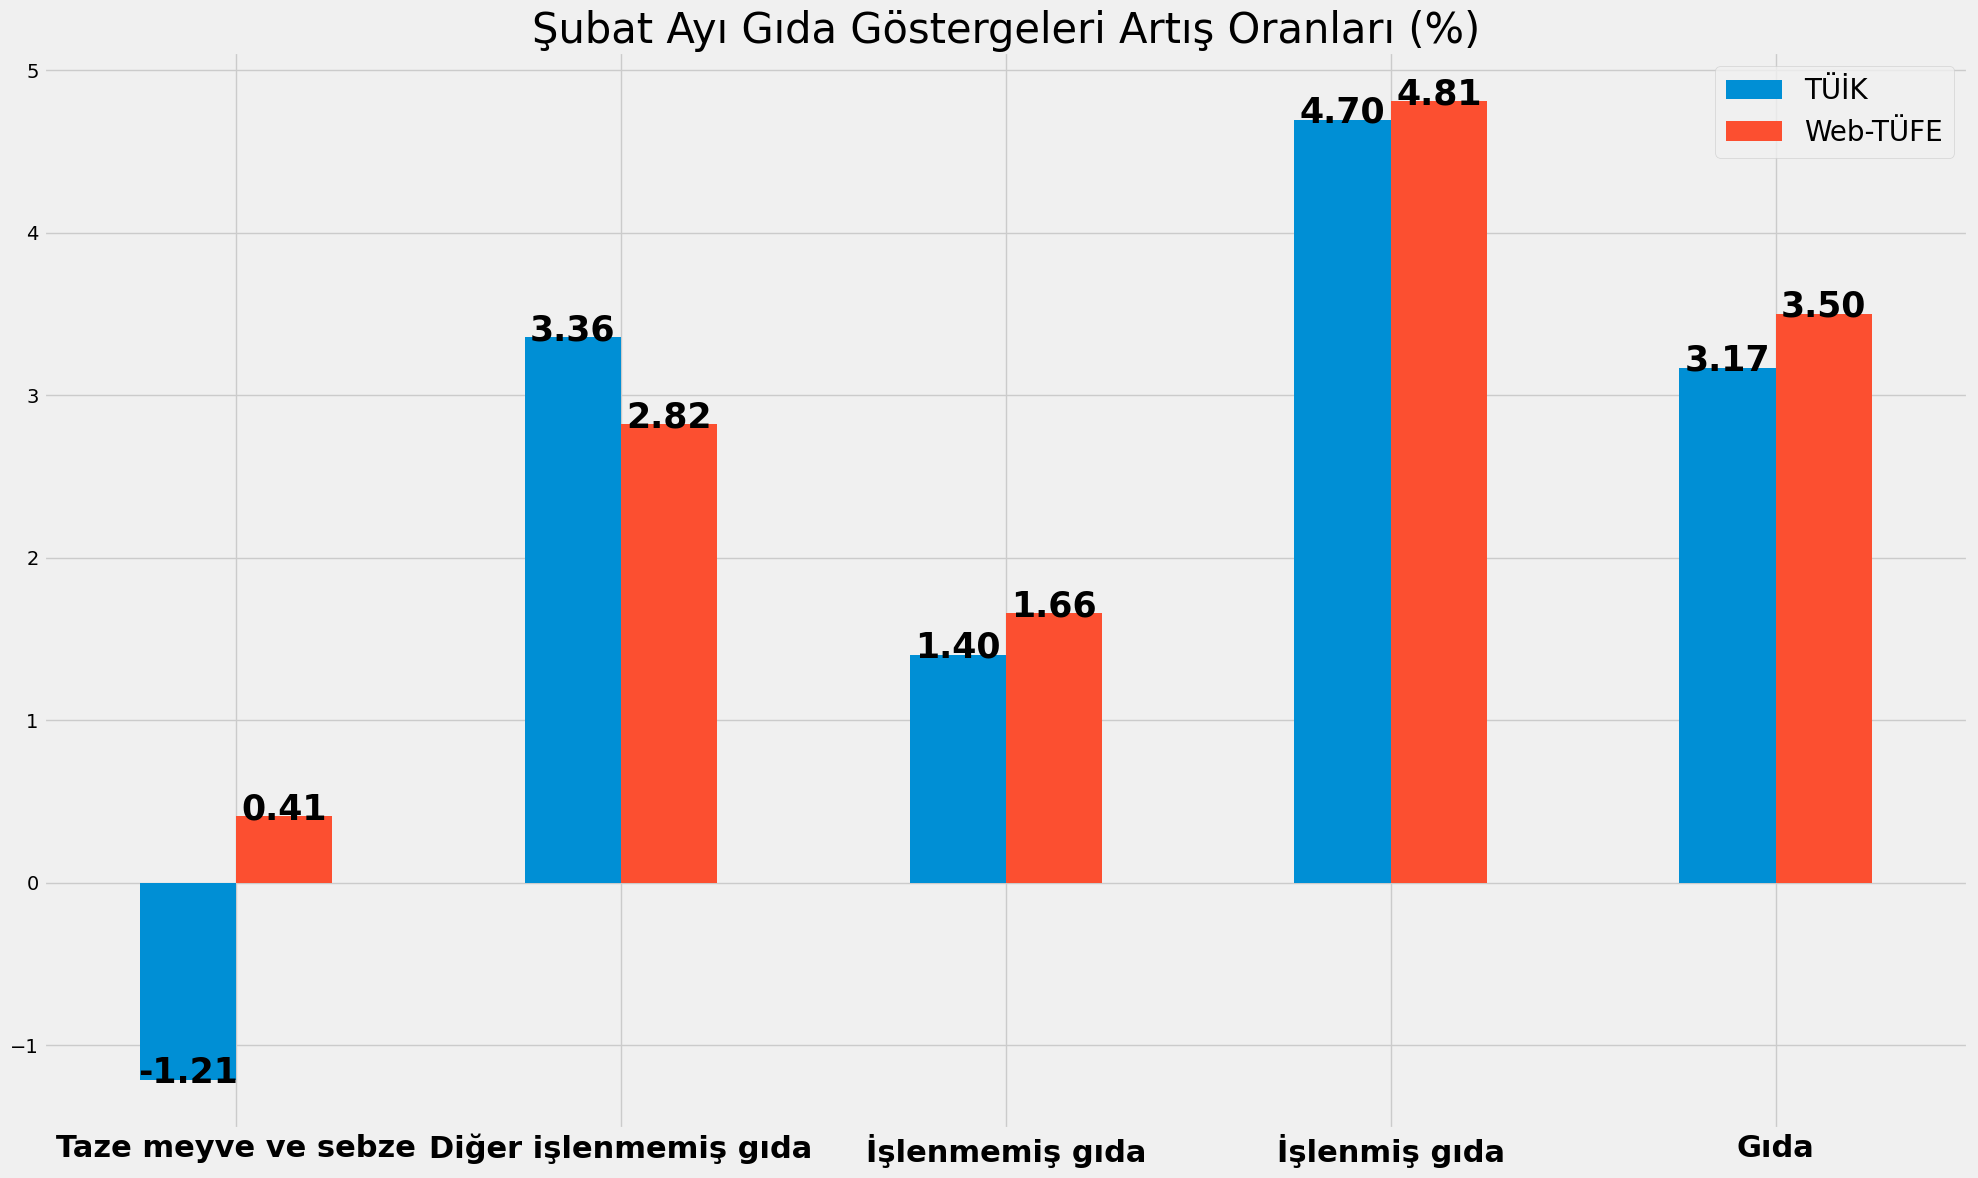

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
t√ºik=pd.read_csv("t√ºikim.csv",index_col=0)
plt.style.use("fivethirtyeight")
# Creating the data
data = {
    "T√úƒ∞K": t√ºik.pct_change().iloc[-1]*100,
    "Web-T√úFE": [0.41,2.82,1.66,4.81],

}

# Convert to DataFrame
df = pd.DataFrame(data)
df.loc["Gƒ±da"]=[3.17,3.5]


# Plotting the bar chart with bold values on top of the bars
plt.figure(figsize=(25, 15))
ax = df.plot(kind='bar', figsize=(20, 12))

# Adding the values on top of the bars with bold text
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=25, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("≈ûubat Ayƒ± Gƒ±da G√∂stergeleri Artƒ±≈ü Oranlarƒ± (%)",fontsize=30)

plt.xticks(rotation=0,fontsize=22,fontweight="bold")
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [37]:
gƒ±da=pd.read_excel("ozel kapsamli tufe gostergeleri (1).xls")
gƒ±da=gƒ±da.iloc[50:51,3:].T
gƒ±da.columns=["Aylƒ±k Deƒüi≈üim"]
gƒ±da=gƒ±da.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gƒ±da)))
gƒ±da=gƒ±da.loc["2024-11-30":]
gƒ±da["Tarih"]=gƒ±da.index.strftime("%Y-%m")
gƒ±da=gƒ±da.reset_index(drop=True)
gƒ±da_c=gƒ±da[["Tarih","Aylƒ±k Deƒüi≈üim"]]


aylƒ±k_endeks_t√ºik=list(gƒ±da_c["Aylƒ±k Deƒüi≈üim"])
t√ºik_aylƒ±k=[1]
t√ºik_aylƒ±k.extend(list(((np.array(aylƒ±k_endeks_t√ºik)/100))+1))
t√ºik_aylƒ±k=pd.DataFrame(t√ºik_aylƒ±k,columns=["T√úƒ∞K"])
t√ºik_aylƒ±k=np.cumprod(t√ºik_aylƒ±k)*100

t√ºik_aylƒ±k.index=pd.date_range(start="2024-10-31",freq="M",periods=len(t√ºik_aylƒ±k)).strftime("%Y-%m-%d")
t√ºik_aylƒ±k.index=pd.to_datetime(t√ºik_aylƒ±k.index)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gƒ±da=gƒ±da.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gƒ±da)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t√ºik_aylƒ±k.index=pd.date_range(start="2024-10-31",freq="M",periods=len(t√ºik_aylƒ±k)).strftime("%Y-%m-%d")


In [39]:
gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)
gfe["T√úƒ∞K"]=t√ºik_aylƒ±k["T√úƒ∞K"]
gfe=gfe.fillna(method="ffill")
gfe=gfe.fillna(100)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\1037474672.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gfe=gfe.fillna(method="ffill")


In [ ]:
"""
    sa_data=pd.DataFrame()
    for col in t√ºik.columns:
        sa_data[f"{col} Aylƒ±k Ortalama"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col]).iloc[:,[-1,]]
        sa_data[f"{col} Aylƒ±k Ortalama"]=sa_data[f"{col} Aylƒ±k Ortalama"].fillna(method="ffill")
        sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
        sa_data["√ñnceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
        sa_data.loc["2024-10","√ñnceki"]=pd.NA
        sa_data[f"{col} √ñnceki Endeks"]=pd.NA
        sa_data.loc["2024-11-01":,f"{col} √ñnceki Endeks"]=sa_data.loc[sa_data["√ñnceki"].dropna(),f"{col} Aylƒ±k Ortalama"].values

    sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
    for col in t√ºik.columns:
        sa_datadegisim[col]=((sa_data[f"{col} Aylƒ±k Ortalama"]/sa_data[f"{col} √ñnceki Endeks"]).dropna()).values
        sa_datadegisim[col]=sa_datadegisim[col].astype(float)
        sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
    sa_datadegisim=sa_datadegisim.resample('M').last()   
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diƒüer i≈ülenmemi≈ü gƒ±da")] = [1.0333601398698096, 1.014720660120335]



    for col in sa_datadegisim.columns:
        sa_datadegisim[f"{col} MA"]=pd.NA


        for row in sa_datadegisim.index:
                t√ºik_data=t√ºik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
                t√ºik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=t√ºik_data.iloc[-1]*sa_datadegisim[col].loc[row]
                from statsmodels.tsa.x13 import x13_arima_analysis


                np.random.seed(42)



                x13_path = r'C:\Users\Bora\Desktop\x13as'
                
                

                
                ayris = x13_arima_analysis(t√ºik_data, x12path=x13_path,outlier=False,log=False)
                sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


    for col in t√ºik.columns:
        sa_datadegisim[f"{col} Fakt√∂r"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
        sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

    sa_datadegisim.columns=['Taze meyve ve sebze', 'Diƒüer i≈ülenmemi≈ü gƒ±da',
    'SA Taze meyve ve sebze', 'SA Diƒüer i≈ülenmemi≈ü gƒ±da',
    'Taze meyve ve sebze Fakt√∂r', 'Ay', 'Diƒüer i≈ülenmemi≈ü gƒ±da Fakt√∂r']
    sa_datadegisim["ƒ∞≈ülenmi≈ü gƒ±da"]=hareketli_aylik_ortalama(√∂zelg√∂stergeler["ƒ∞≈ülenmi≈ü gƒ±da"])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("ƒ∞≈ülenmi≈ü gƒ±da")] = [2.61412286061347, 1.60328139006671]


    aƒüƒ±rlƒ±klar=pd.read_csv("aƒüƒ±rlƒ±klar.csv",index_col=0)
    w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
    w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
    meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
    sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hari√ß)"])]["Unnamed: 1"].values
    meyvesebze=np.concatenate([meyveler,sebzeler])
    digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balƒ±k","Konserve Balƒ±k","Yumurta"]

    islenmemis=digerislenmemis+list(meyvesebze)

    aƒüƒ±rlƒ±klar=aƒüƒ±rlƒ±klar.reset_index()
    meyvesebzeler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(meyvesebze)].iloc[:,[0,3]]
    meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
    digerislenmemisler=aƒüƒ±rlƒ±klar[aƒüƒ±rlƒ±klar["√úr√ºn"].isin(digerislenmemis)].iloc[:,[0,3]]
    digerislenmemisler.index=len(digerislenmemisler)*["SA Diƒüer i≈ülenmemi≈ü gƒ±da"]
    islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
    islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()

    sa_datadegisim["SA ƒ∞≈ülenmemi≈ü gƒ±da"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()/islenmemisler.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().sum()).sum(axis=1)


    islenmisler=aƒüƒ±rlƒ±klar[~aƒüƒ±rlƒ±klar["√úr√ºn"].isin(islenmemisler["√úr√ºn"].values)].iloc[:,[0,3]]
    islenmisler.index=len(islenmisler)*["ƒ∞≈ülenmi≈ü gƒ±da"]

    islenmemisler.index=["SA ƒ∞≈ülenmemi≈ü gƒ±da"]*len(islenmemisler)

    genel=pd.concat([islenmemisler,islenmisler],axis=0)

    sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Aƒüƒ±rlƒ±k"].sum().index]*genel.groupby(level=0)["Aƒüƒ±rlƒ±k"].sum()).sum(axis=1)
    sa_datadegisim.to_csv("mag√∂stergeler.csv")
"""

In [ ]:
g√∂stergeaylƒ±k=pd.DataFrame()
for col in t√ºik.columns:
    g√∂stergeaylƒ±k[col]=hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    g√∂stergeaylƒ±k[col].iloc[-1]=(((hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].iloc[-1]/hareketli_aylik_ortalama(√∂zelg√∂stergeler[col])["Aylƒ±k Ortalama"].loc["2025-02-01"]))-1)*100

In [27]:
g√∂stergeaylƒ±k


Taze meyve ve sebze  Diƒüer i≈ülenmemi≈ü gƒ±da  ƒ∞≈ülenmemi≈ü gƒ±da  \
Tarih                                                                     
2024-11-30             5.477013               1.741840         3.612414   
2024-12-31             6.073420               3.877814         4.924704   
2025-01-31             6.135508               3.243180         4.713203   
2025-02-28            -0.040998               2.862252         1.335669   
2025-03-31            12.344673               3.698780         7.990578   

            ƒ∞≈ülenmi≈ü gƒ±da  
Tarih                      
2024-11-30       0.861357  
2024-12-31       2.034034  
2025-01-31       2.438807  
2025-02-28       4.798631  
2025-03-31       2.912418

In [19]:
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
t√ºik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    t√ºik=pd.concat([t√ºik,veri],axis=1)
t√ºik=t√ºik.drop("Tarih",axis=1)
t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))
t√ºik=t√ºik.loc["2016":]
t√ºik.columns=['Taze meyve ve sebze','Diƒüer i≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmemi≈ü gƒ±da','ƒ∞≈ülenmi≈ü gƒ±da']
t√ºik.to_csv("t√ºikim.csv")


git_add_commit_push()


C:\Users\Bora\AppData\Local\Temp\ipykernel_9800\2997715634.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t√ºik=t√ºik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(t√ºik)))


Commit i≈ülemi ba≈üarƒ±lƒ±: update
Push i≈ülemi ba≈üarƒ±lƒ±.
